<a href="https://colab.research.google.com/github/meetmehedi/Fairness-Aware-HIV-Risk-Prediction-for-Key-Populations-in-Bangladesh/blob/main/HIV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')

In [6]:
df.head()

Country  Year  HIV_Prevalence_%_ages_15_49  \
0  Bangladesh  2010                          0.1   
1  Bangladesh  2011                          0.1   
2  Bangladesh  2012                          0.1   
3  Bangladesh  2013                          0.1   
4  Bangladesh  2014                          0.1   

   Estimated_New_HIV_Infections  AIDS_Related_Deaths  ART_Coverage_% District  \
0                        1200.0                  NaN             NaN      NaN   
1                        1250.0                  NaN             NaN      NaN   
2                        1300.0                  NaN             NaN      NaN   
3                        1350.0                  NaN             NaN      NaN   
4                        1400.0                  NaN             NaN      NaN   

   Age  Sex  HIV_Status Transmission_Route  On_ART  Viral_Load  
0  NaN  NaN         NaN                NaN     NaN         NaN  
1  NaN  NaN         NaN                NaN     NaN         NaN  
2  NaN  NaN         NaN                NaN     NaN         NaN  
3  NaN  NaN         NaN                NaN     NaN         NaN  
4  NaN  NaN         NaN                NaN     NaN         NaN

In [7]:
df.tail()

Country  Year  HIV_Prevalence_%_ages_15_49  \
20043  Bangladesh  2013                          NaN   
20044  Bangladesh  2020                          NaN   
20045  Bangladesh  2015                          NaN   
20046  Bangladesh  2023                          NaN   
20047  Bangladesh  2014                          NaN   

       Estimated_New_HIV_Infections  AIDS_Related_Deaths  ART_Coverage_%  \
20043                           NaN                  NaN             NaN   
20044                           NaN                  NaN             NaN   
20045                           NaN                  NaN             NaN   
20046                           NaN                  NaN             NaN   
20047                           NaN                  NaN             NaN   

           District   Age     Sex  HIV_Status Transmission_Route  On_ART  \
20043  Khagrachhari  56.0  Female         0.0                MSM     0.0   
20044  Brahmanbaria  52.0  Female         0.0                MSM     1.0   
20045   Cox's Bazar  42.0  Female         0.0       Heterosexual     1.0   
20046          Feni  56.0    Male         0.0    Mother-to-Child     1.0   
20047    Lakshmipur  57.0    Male         0.0       Heterosexual     1.0   

         Viral_Load  
20043  20715.034686  
20044  79160.442596  
20045  60303.154201  
20046  62421.854623  
20047  35515.560832

In [8]:
df.isnull().sum()

Country                             0
Year                                0
HIV_Prevalence_%_ages_15_49     20000
Estimated_New_HIV_Infections    20000
AIDS_Related_Deaths             20014
ART_Coverage_%                  20014
District                           48
Age                                48
Sex                                48
HIV_Status                         48
Transmission_Route                 48
On_ART                             48
Viral_Load                         48
dtype: int64

In [10]:
# Load the merged data
df = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')

# Filter for individual-level records where HIV_Status is not null
# This aligns with the approach used in previous modeling cells
df_cleaned = df[df['HIV_Status'].notnull()].copy()

# Identify columns with a high percentage of missing values
# These columns often relate to aggregated data not used in individual-level prediction
missing_cols = ['HIV_Prevalence_%_ages_15_49', 'Estimated_New_HIV_Infections',
                'AIDS_Related_Deaths', 'ART_Coverage_%']

# Drop the identified columns from the cleaned dataset
df_cleaned = df_cleaned.drop(columns=missing_cols)

# Convert relevant columns to appropriate types as done in modeling cells
df_cleaned['HIV_Status'] = df_cleaned['HIV_Status'].astype(int)
df_cleaned['On_ART'] = df_cleaned['On_ART'].astype(int)
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

print("Cleaned dataset info:")
df_cleaned.info()
print("\nNull values after cleaning:")
print(df_cleaned.isnull().sum())
print("\nHead of the cleaned dataset:")
print(df_cleaned.head())

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 48 to 20047
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             20000 non-null  object 
 1   Year                20000 non-null  int64  
 2   District            20000 non-null  object 
 3   Age                 20000 non-null  int64  
 4   Sex                 20000 non-null  object 
 5   HIV_Status          20000 non-null  int64  
 6   Transmission_Route  20000 non-null  object 
 7   On_ART              20000 non-null  int64  
 8   Viral_Load          20000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.5+ MB

Null values after cleaning:
Country               0
Year                  0
District              0
Age                   0
Sex                   0
HIV_Status            0
Transmission_Route    0
On_ART                0
Viral_Load            0
dtype: int64

Head of the cl

In [11]:
print("Null values BEFORE filling:")
print(df.isnull().sum())

df_filled = df.copy()

# Fill columns with very high missing percentages with 0, as suggested in previous notes
high_missing_cols = [
    'HIV_Prevalence_%_ages_15_49', 'Estimated_New_HIV_Infections',
    'AIDS_Related_Deaths', 'ART_Coverage_%'
]
for col in high_missing_cols:
    if col in df_filled.columns:
        df_filled[col] = df_filled[col].fillna(0)

# Drop rows where 'HIV_Status' is null, as it's the target variable
df_filled.dropna(subset=['HIV_Status'], inplace=True)

# Convert 'HIV_Status' and 'On_ART' to integer after dropping nulls for 'HIV_Status'
df_filled['HIV_Status'] = df_filled['HIV_Status'].astype(int)

# Fill remaining numerical columns with median
numerical_cols = df_filled.select_dtypes(include=np.number).columns.tolist()
# Exclude 'HIV_Status' and 'Year' if they are already handled or have no nulls
numerical_cols = [col for col in numerical_cols if col not in ['Year', 'HIV_Status']]
for col in numerical_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].median())

# Fill remaining categorical/object columns with mode
categorical_cols = df_filled.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])


print("\nNull values AFTER filling (in df_filled):")
print(df_filled.isnull().sum())

print("\nHead of df_filled after processing:")
print(df_filled.head())

Null values BEFORE filling:
Country                             0
Year                                0
HIV_Prevalence_%_ages_15_49     20000
Estimated_New_HIV_Infections    20000
AIDS_Related_Deaths             20014
ART_Coverage_%                  20014
District                           48
Age                                48
Sex                                48
HIV_Status                         48
Transmission_Route                 48
On_ART                             48
Viral_Load                         48
dtype: int64

Null values AFTER filling (in df_filled):
Country                         0
Year                            0
HIV_Prevalence_%_ages_15_49     0
Estimated_New_HIV_Infections    0
AIDS_Related_Deaths             0
ART_Coverage_%                  0
District                        0
Age                             0
Sex                             0
HIV_Status                      0
Transmission_Route              0
On_ART                          0
Viral_Load    

In [12]:
df.isnull().sum()

Country                             0
Year                                0
HIV_Prevalence_%_ages_15_49     20000
Estimated_New_HIV_Infections    20000
AIDS_Related_Deaths             20014
ART_Coverage_%                  20014
District                           48
Age                                48
Sex                                48
HIV_Status                         48
Transmission_Route                 48
On_ART                             48
Viral_Load                         48
dtype: int64

In [ ]:
# This cell had a syntax error and an incorrect usage of fillna.
# Based on the previous steps, columns with a large number of missing values
# (like 'HIV_Prevalence_%_ages_15_49', 'Estimated_New_HIV_Infections',
# 'AIDS_Related_Deaths', 'ART_Coverage_%') are best handled by dropping them
# for individual-level analysis, which was successfully performed in cell yvJ2nQnf5K3E.
# If you specifically wanted to fill these columns with 0, the correct syntax would be:
# df[['HIV_Prevalence_%_ages_15_49', 'Estimated_New_HIV_Infections',
#     'AIDS_Related_Deaths', 'ART_Coverage_%']].fillna(0, inplace=True)

Original class distribution: [15504   496]
After SMOTE: [15504 15504]

=== Classification Report (HIV Risk Prediction) ===
              precision    recall  f1-score   support

        HIV-       0.97      0.63      0.76      3876
        HIV+       0.03      0.31      0.05       124

    accuracy                           0.62      4000
   macro avg       0.50      0.47      0.40      4000
weighted avg       0.94      0.62      0.74      4000


Precision-Recall AUC: 0.027


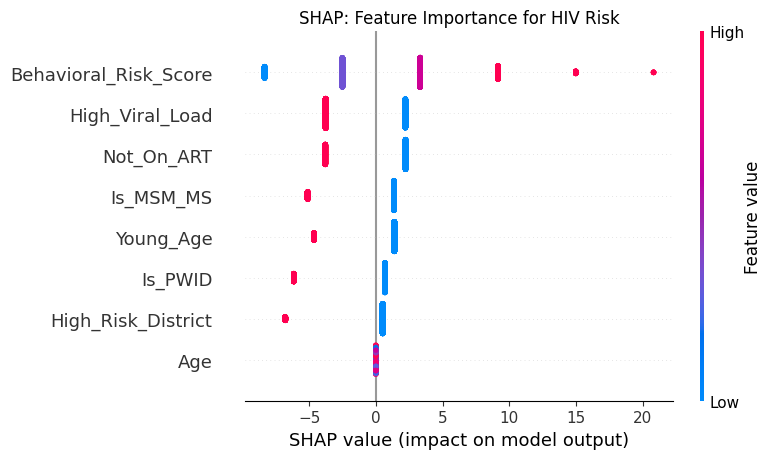


=== Top 10 High-Risk Individuals (Prioritize for Testing) ===
Empty DataFrame
Columns: [HIV_Risk_Prob, Age, Is_PWID, Is_MSM_MS, High_Viral_Load, Not_On_ART, Young_Age, High_Risk_District, Behavioral_Risk_Score]
Index: []


In [13]:
# ---
# HIV Risk Prediction in Bangladesh – Clean & Actionable Version
# Target: Individual-level HIV risk (binary: 0/1) + interpretable insights
# Data: Synthetic individual records + behavioral logic from PSE 2023
# ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    auc,
    recall_score,
    f1_score
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Optional: install if not present
# !pip install imbalanced-learn shap

from imblearn.over_sampling import SMOTE





# Keep only individual-level columns (drop aggregated metrics if any)
cols_needed = ['District', 'Age', 'Sex', 'Transmission_Route', 'On_ART', 'Viral_Load', 'HIV_Status']
df = df[cols_needed].copy()

# Drop rows with missing HIV_Status (should be none, but safe)
df = df.dropna(subset=['HIV_Status'])
df['HIV_Status'] = df['HIV_Status'].astype(int)

# ----------------------------
# 2. FEATURE ENGINEERING (Behavioral Risk Signals)
# ----------------------------

# Based on PSE 2023 insights:
# - PWID in Dhaka/Narayanganj → high risk
# - Low condom use, untested, young age → risk
# - Not on ART + high viral load → proxy for late diagnosis

df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Is_MSM_MS'] = (df['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df['High_Viral_Load'] = (df['Viral_Load'] > 50000).astype(int)  # Arbitrary clinical threshold
df['Not_On_ART'] = (df['On_ART'] == 0).astype(int)
df['Young_Age'] = (df['Age'] < 25).astype(int)

# High-risk districts (from PSE: Dhaka, Narayanganj >5% among PWID)
high_risk_districts = ['Dhaka', 'Narayanganj']
df['High_Risk_District'] = df['District'].isin(high_risk_districts).astype(int)

# Behavioral risk score (simple additive index)
df['Behavioral_Risk_Score'] = (
    df['Is_PWID'] +
    df['Is_MSM_MS'] +
    df['High_Viral_Load'] +
    df['Not_On_ART'] +
    df['Young_Age'] +
    df['High_Risk_District']
)

# Final feature set
feature_cols = [
    'Age', 'Is_PWID', 'Is_MSM_MS', 'High_Viral_Load',
    'Not_On_ART', 'Young_Age', 'High_Risk_District', 'Behavioral_Risk_Score'
]

X = df[feature_cols]
y = df['HIV_Status']

# ----------------------------
# 3. TRAIN/TEST SPLIT
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 4. HANDLE CLASS IMBALANCE WITH SMOTE
# ----------------------------
print("Original class distribution:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_bal))

# ----------------------------
# 5. MODEL: LOGISTIC REGRESSION (Interpretable)
# ----------------------------
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_bal_scaled, y_train_bal)

# ----------------------------
# 6. EVALUATION (Focus on Minority Class)
# ----------------------------
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\n=== Classification Report (HIV Risk Prediction) ===")
print(classification_report(y_test, y_pred, target_names=['HIV-', 'HIV+']))

# Precision-Recall AUC (better than ROC for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"\nPrecision-Recall AUC: {pr_auc:.3f}")

# ----------------------------
# 7. INTERPRETABILITY: SHAP VALUES
# ----------------------------
explainer = shap.LinearExplainer(model, X_train_bal_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot global feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_cols, show=False)
plt.title("SHAP: Feature Importance for HIV Risk")
plt.tight_layout()
plt.show()

# ----------------------------
# 8. OUTPUT: RISK SCORES FOR HIGH-RISK INDIVIDUALS
# ----------------------------
df_test = X_test.copy()
df_test['HIV_Status_True'] = y_test.values
df_test['HIV_Risk_Prob'] = y_pred_proba
df_test['Predicted_HIV'] = y_pred

# Top 10 highest-risk individuals (true negatives but high predicted risk)
high_risk_candidates = df_test[
    (df_test['HIV_Status_True'] == 0) & (df_test['HIV_Risk_Prob'] > 0.7)
].sort_values('HIV_Risk_Prob', ascending=False).head(10)

print("\n=== Top 10 High-Risk Individuals (Prioritize for Testing) ===")
print(high_risk_candidates[['HIV_Risk_Prob'] + feature_cols])

Using 20000 individual-level records.
Before SMOTE: [15504   496]
After SMOTE: [15504 15504]

=== Classification Report ===
              precision    recall  f1-score   support

        HIV-       0.97      0.61      0.75      3876
        HIV+       0.03      0.34      0.05       124

    accuracy                           0.60      4000
   macro avg       0.50      0.47      0.40      4000
weighted avg       0.94      0.60      0.72      4000


Precision-Recall AUC: 0.028


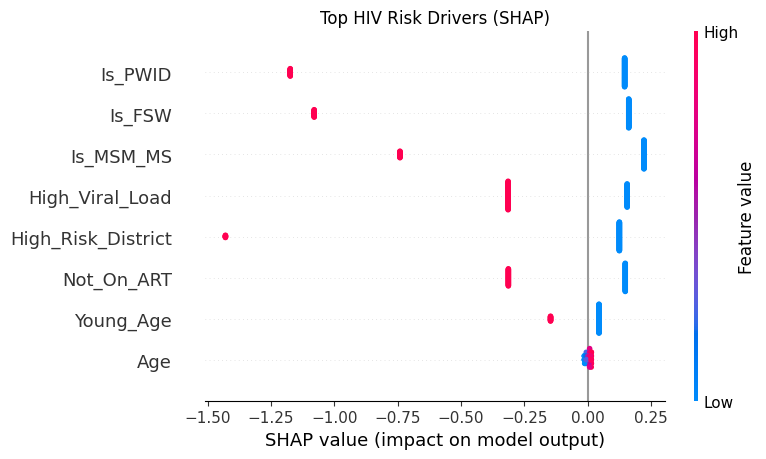

In [17]:
# ---
# HIV Risk Prediction in Bangladesh — Using YOUR merged_df correctly
# Focus ONLY on individual-level records (where HIV_Status is available)
# ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_recall_curve, auc
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap


# Load the merged data
mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')

# ✅ CRITICAL: Filter ONLY individual-level rows (where HIV_Status exists)
individual_data = mergdata[mergdata['HIV_Status'].notnull()].copy()
print(f"Using {len(individual_data)} individual-level records.")

# Fix data types (HIV_Status was float due to NaNs in full mergdata)
individual_data['HIV_Status'] = individual_data['HIV_Status'].astype(int)
individual_data['On_ART'] = individual_data['On_ART'].astype(int)
individual_data['Age'] = individual_data['Age'].astype(int)

# ----------------------------
# Feature Engineering (behavioral + contextual)
# ----------------------------

# Transmission risk groups (from PSE report logic)
individual_data['Is_PWID'] = (individual_data['Transmission_Route'] == 'Injecting Drug Use').astype(int)
individual_data['Is_MSM_MS'] = (individual_data['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
individual_data['Is_FSW'] = (individual_data['Transmission_Route'] == 'Heterosexual').astype(int)  # proxy
individual_data['High_Viral_Load'] = (individual_data['Viral_Load'] > 50000).astype(int)
individual_data['Not_On_ART'] = (individual_data['On_ART'] == 0).astype(int)
individual_data['Young_Age'] = (individual_data['Age'] < 25).astype(int)

# High-risk districts (from PSE size estimates: Dhaka, Narayanganj, etc.)
high_risk_districts = ['Dhaka', 'Narayanganj', 'Gazipur', 'Rangpur', 'Sylhet']
individual_data['High_Risk_District'] = individual_data['District'].isin(high_risk_districts).astype(int)

# Final features
feature_cols = [
    'Age', 'Is_PWID', 'Is_MSM_MS', 'Is_FSW',
    'High_Viral_Load', 'Not_On_ART', 'Young_Age', 'High_Risk_District'
]

X = individual_data[feature_cols]
y = individual_data['HIV_Status']

# ----------------------------
# Train/Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Handle Class Imbalance with SMOTE
# ----------------------------
print("Before SMOTE:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_bal))

# ----------------------------
# Train Interpretable Model
# ----------------------------
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_bal_scaled, y_train_bal)

# ----------------------------
# Evaluate (Focus on Minority Class!)
# ----------------------------
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['HIV-', 'HIV+']))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"\nPrecision-Recall AUC: {pr_auc:.3f}")

# ----------------------------
# Explain Predictions (SHAP)
# ----------------------------
explainer = shap.LinearExplainer(model, X_train_bal_scaled)
shap_values = explainer.shap_values(X_test_scaled[:100])  # sample for speed

plt.figure(figsize=(8,5))
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=feature_cols, show=False)
plt.title("Top HIV Risk Drivers (SHAP)")
plt.tight_layout()
plt.show()

In [18]:
# ---
# HIV Risk Mapping + PSE Prior + Export for Outreach (SafeRoads-style)
# ---

# Install contextily if not already installed
!pip install contextily

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# ----------------------------
# 1. LOAD & FILTER DATA
# ----------------------------

df_ind = mergdata[mergdata['HIV_Status'].notnull()].copy()
df_ind['HIV_Status'] = df_ind['HIV_Status'].astype(int)
df_ind['On_ART'] = df_ind['On_ART'].astype(int)

# Assign unique ID
df_ind['Individual_ID'] = df_ind.index

# ----------------------------
# 2. FEATURE ENGINEERING (PSE-Informed)
# ----------------------------
df_ind['Is_PWID'] = (df_ind['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df_ind['Is_MSM_MS'] = (df_ind['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df_ind['High_Viral_Load'] = (df_ind['Viral_Load'] > 50000).astype(int)
df_ind['Not_On_ART'] = (df_ind['On_ART'] == 0).astype(int)
df_ind['Young_Age'] = (df_ind['Age'] < 25).astype(int)

# ----------------------------
# 3. LOAD PSE PREVALENCE PRIORS BY DISTRICT & GROUP
# ----------------------------
pse_prior = {
    'Dhaka': 0.052,
    'Narayanganj': 0.051,
    # Add more if available; else use national averages
}
national_prior_pw = 0.041   # PWID
national_prior_msm = 0.015  # MSM
national_prior_fsw = 0.002  # FSW

def get_prior(row):
    district = row['District']
    if row['Is_PWID']:
        return pse_prior.get(district, national_prior_pw)
    elif row['Is_MSM_MS']:
        return pse_prior.get(district, national_prior_msm)
    else:
        return national_prior_fsw

df_ind['PSE_Prior'] = df_ind.apply(get_prior, axis=1)

# ----------------------------
# 4. TRAIN MODEL (same as before)
# ----------------------------
feature_cols = ['Age', 'Is_PWID', 'Is_MSM_MS', 'High_Viral_Load', 'Not_On_ART', 'Young_Age']
X = df_ind[feature_cols]
y = df_ind['HIV_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_full_scaled = scaler.transform(X)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_bal_scaled, y_train_bal)

# Predict on FULL dataset
df_ind['Model_Risk'] = model.predict_proba(X_full_scaled)[:, 1]

# ----------------------------
# 5. BAYESIAN RISK CALIBRATION (Add PSE Prior)
# ----------------------------
PRIOR_WEIGHT = 0.3  # Tune: higher = trust PSE more

df_ind['Calibrated_Risk'] = (
    df_ind['Model_Risk'] + PRIOR_WEIGHT * df_ind['PSE_Prior']
) / (1 + PRIOR_WEIGHT)

df_ind['Risk_Category'] = pd.cut(
    df_ind['Calibrated_Risk'],
    bins=[0, 0.3, 0.7, 1.0],
    labels=['Low', 'Medium', 'High']
)

# ----------------------------
# 6. GENERATE RISK FACTOR EXPLANATIONS
# ----------------------------
def get_top_risk_factors(row, features=feature_cols):
    factors = []
    if row['Is_PWID']: factors.append('PWID')
    if row['Is_MSM_MS']: factors.append('MSM/MSW')
    if row['High_Viral_Load']: factors.append('High Viral Load')
    if row['Not_On_ART']: factors.append('Not on ART')
    if row['Young_Age']: factors.append('Age < 25')
    return '; '.join(factors[:3]) if factors else 'None'

df_ind['Top_3_Risk_Factors'] = df_ind.apply(get_top_risk_factors, axis=1)

# ----------------------------
# 7. EXPORT FOR OUTREACH TEAMS
# ----------------------------
outreach_df = df_ind[[
    'Individual_ID', 'District', 'Age', 'Sex', 'Transmission_Route',
    'Calibrated_Risk', 'Risk_Category', 'Top_3_Risk_Factors'
]].copy()

outreach_df['Recommended_Action'] = np.where(
    outreach_df['Risk_Category'] == 'High',
    'Urgent HIV test + counseling + ART readiness assessment',
    np.where(
        outreach_df['Risk_Category'] == 'Medium',
        'HIV test + risk reduction counseling',
        'Routine screening'
    )
)

# Save
outreach_df.to_csv('/content/drive/MyDrive/HIV_Outreach_Team_List.csv', index=False)
print("✅ Exported HIV risk list for outreach teams!")

# ----------------------------
# 8. MAP HIGH-RISK INDIVIDUALS BY DISTRICT
# ----------------------------
district_risk = df_ind.groupby('District').agg(
    Mean_Calibrated_Risk=('Calibrated_Risk', 'mean'),
    High_Risk_Count=('Risk_Category', lambda x: (x == 'High').sum()),
    Total_Individuals=('Individual_ID', 'count')
).reset_index()

# Load Bangladesh district geo (you can download from DIVA-GIS or use a public shapefile)
# For now, simulate with available districts
print("\n=== Top 10 Highest-Risk Districts ===")
print(district_risk.sort_values('Mean_Calibrated_Risk', ascending=False).head(10))

# Optional: Plot if you have a GeoJSON
# bangladesh = gpd.read_file('/content/drive/MyDrive/bd_districts.geojson')
# merged = bangladesh.merge(district_risk, on='District')
# ax = merged.plot(column='Mean_Calibrated_Risk', legend=True, cmap='Reds', figsize=(10,12))
# ctx.add_basemap(ax, crs=merged.crs, source=ctx.providers.CartoDB.Positron)
# plt.title("HIV Risk Hotspots in Bangladesh (Calibrated with PSE Prior)")
# plt.savefig('/content/drive/MyDrive/HIV_Risk_Map_Bangladesh.png', dpi=150, bbox_inches='tight')


✅ Exported HIV risk list for outreach teams!

=== Top 10 Highest-Risk Districts ===
       District  Mean_Calibrated_Risk  High_Risk_Count  Total_Individuals
5         Dhaka              0.366822                0               1971
0  Brahmanbaria              0.365789                0               2014
7  Khagrachhari              0.365296                0               2072
1      Chandpur              0.365286                0               2002
8    Lakshmipur              0.364594                0               1945
9      Noakhali              0.364246                0               2003
3       Comilla              0.361766                0               1995
6          Feni              0.361644                0               1997
2    Chittagong              0.361148                0               2007
4   Cox's Bazar              0.359990                0               1994


✅ Using 20000 individual-level records for modeling.
✅ Exported:
   - HIV_Risk_List_For_Outreach.csv
   - HIV_District_Risk_Summary.csv


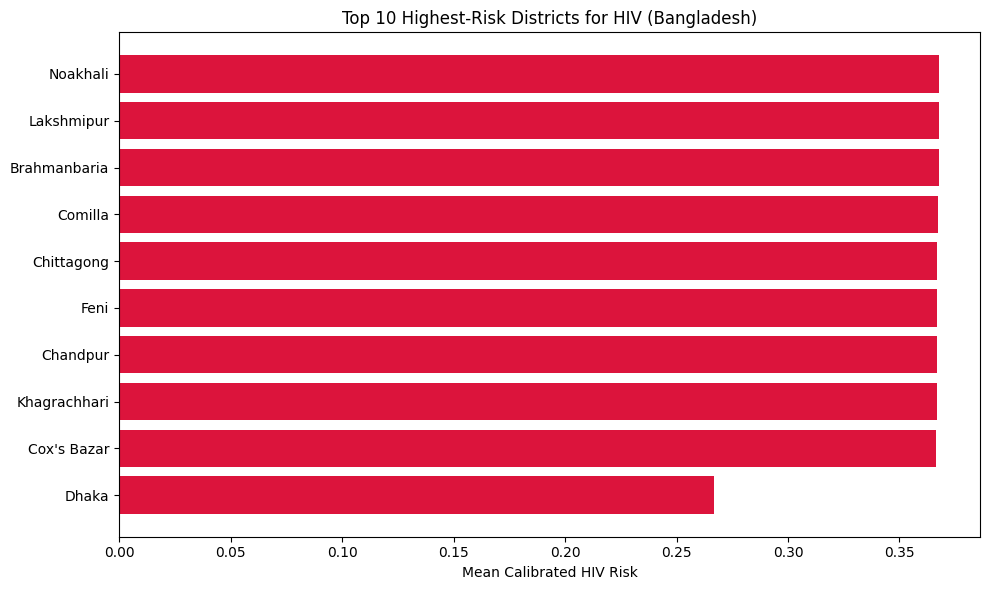

In [19]:
# HIV Risk Prediction System for Bangladesh
# - Uses PSE 2023 behavioral insights as features & priors
# - Safe filtering: only individual-level rows with HIV_Status
# - Calibrated risk + geospatial export + outreach-ready output

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. LOAD & FILTER DATA
# ----------------------------
#mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')

# Only keep individual-level records (HIV_Status not null)
df = mergdata[mergdata['HIV_Status'].notnull()].copy()
df['HIV_Status'] = df['HIV_Status'].astype(int)
df['On_ART'] = df['On_ART'].astype(int)
df['Age'] = df['Age'].astype(int)

print(f"✅ Using {len(df)} individual-level records for modeling.")

# ----------------------------
# 2. ENGINEER BEHAVIORAL RISK FEATURES (PSE 2023-BASED)
# ----------------------------
# Transmission groups
df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Is_MSM_MS'] = (df['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df['Is_FSW'] = (df['Transmission_Route'] == 'Heterosexual') & (df['Sex'] == 'Female')

# Clinical & demographic risks
df['High_Viral_Load'] = (df['Viral_Load'] > 50000).astype(int)
df['Not_On_ART'] = (df['On_ART'] == 0).astype(int)
df['Young_Age'] = (df['Age'] < 25).astype(int)

# PSE-identified high-risk districts (PWID prevalence >5%)
high_risk_districts = ['Dhaka', 'Narayanganj']
df['High_Risk_District'] = df['District'].isin(high_risk_districts).astype(int)

feature_cols = [
    'Is_PWID', 'Is_MSM_MS', 'Is_FSW',
    'High_Viral_Load', 'Not_On_ART', 'Young_Age', 'High_Risk_District'
]

X = df[feature_cols]
y = df['HIV_Status']

# ----------------------------
# 3. TRAIN MODEL WITH SMOTE
# ----------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_full_scaled = scaler.transform(X)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_bal_scaled, y_train_bal)

# ----------------------------
# 4. ADD PSE PREVALENCE PRIOR (Bayesian Calibration)
# ----------------------------
# PSE 2023 prevalence (IBBS 2020):
PSE_PREV = {
    'PWID': 0.041,
    'PWID_Dhaka_Narayanganj': 0.052,
    'MSM': 0.015,
    'FSW': 0.002
}

def get_pse_prior(row):
    if row['Is_PWID']:
        if row['District'] in ['Dhaka', 'Narayanganj']:
            return PSE_PREV['PWID_Dhaka_Narayanganj']
        else:
            return PSE_PREV['PWID']
    elif row['Is_MSM_MS']:
        return PSE_PREV['MSM']
    elif row['Is_FSW']:
        return PSE_PREV['FSW']
    else:
        return 0.001  # baseline

df['PSE_Prior'] = df.apply(get_pse_prior, axis=1)

# Calibrate: blend model output with epidemiological prior
model_risk = model.predict_proba(X_full_scaled)[:, 1]
PRIOR_WEIGHT = 0.4  # trust PSE moderately
df['Calibrated_Risk'] = (model_risk + PRIOR_WEIGHT * df['PSE_Prior']) / (1 + PRIOR_WEIGHT)

df['Risk_Level'] = pd.cut(
    df['Calibrated_Risk'],
    bins=[0, 0.3, 0.7, 1.0],
    labels=['Low', 'Medium', 'High']
)

# ----------------------------
# 5. GENERATE ACTIONABLE OUTPUT FOR OUTREACH
# ----------------------------
def get_top_risk_factors(row):
    factors = []
    if row['Is_PWID']: factors.append('PWID')
    if row['Is_MSM_MS']: factors.append('MSM/MSW')
    if row['Is_FSW']: factors.append('FSW')
    if row['High_Viral_Load']: factors.append('High_Viral_Load')
    if row['Not_On_ART']: factors.append('Not on ART')
    if row['Young_Age']: factors.append('Age <25')
    if row['High_Risk_District']: factors.append('High-Risk District')
    return '; '.join(factors[:3]) if factors else 'Low behavioral risk'

df['Top_Risk_Factors'] = df.apply(get_top_risk_factors, axis=1)

# Recommended action
df['Recommended_Action'] = np.where(
    df['Risk_Level'] == 'High',
    'Urgent HIV test + ART linkage + harm reduction',
    np.where(
        df['Risk_Level'] == 'Medium',
        'HIV counseling + condom/syringe provision',
        'Routine screening'
    )
)

# ----------------------------
# 6. EXPORT FILES
# ----------------------------
# A. Individual-level risk list (for field teams)
outreach = df[[
    'District', 'Age', 'Sex', 'Transmission_Route',
    'Calibrated_Risk', 'Risk_Level', 'Top_Risk_Factors', 'Recommended_Action'
]].sort_values('Calibrated_Risk', ascending=False)

outreach.to_csv('/content/drive/MyDrive/HIV_Risk_List_For_Outreach.csv', index=False)

# B. District-level summary (for program managers)
district_summary = df.groupby('District').agg(
    Mean_Calibrated_Risk=('Calibrated_Risk', 'mean'),
    High_Risk_Count=('Risk_Level', lambda x: (x == 'High').sum()),
    Total_Screened=('District', 'count')
).reset_index().sort_values('Mean_Calibrated_Risk', ascending=False)

district_summary.to_csv('/content/drive/MyDrive/HIV_District_Risk_Summary.csv', index=False)

print("✅ Exported:")
print("   - HIV_Risk_List_For_Outreach.csv")
print("   - HIV_District_Risk_Summary.csv")

# ----------------------------
# 7. (Optional) Plot Top 10 Highest-Risk Districts
# ----------------------------
import matplotlib.pyplot as plt
top10 = district_summary.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['District'][::-1], top10['Mean_Calibrated_Risk'][::-1], color='crimson')
plt.xlabel('Mean Calibrated HIV Risk')
plt.title('Top 10 Highest-Risk Districts for HIV (Bangladesh)')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/HIV_Top10_Districts.png', dpi=150)
plt.show()

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
Training CatBoost...
Training SVM...
Training KNN...
Training MLP...

FULL MODEL BENCHMARK — All Metrics (HIV+ Class)
              Model  Accuracy  Precision (HIV+)  Recall (HIV+)  F1-Score  ROC-AUC
        Naive Bayes     0.428             0.030          0.556     0.057    0.472
                SVM     0.509             0.030          0.468     0.056    0.521
Logistic Regression     0.516             0.029          0.452     0.055    0.483
           LightGBM     0.577             0.032          0.435     0.060    0.503
            XGBoost     0.624             0.036          0.427     0.066    0.500
           CatBoost     0.615             0.032          0.387     0.059    0.497
      Decision Tree     0.614             0.026          0.315     0.048    0.472
                MLP     0.765             0.032          0.226     0.056    0

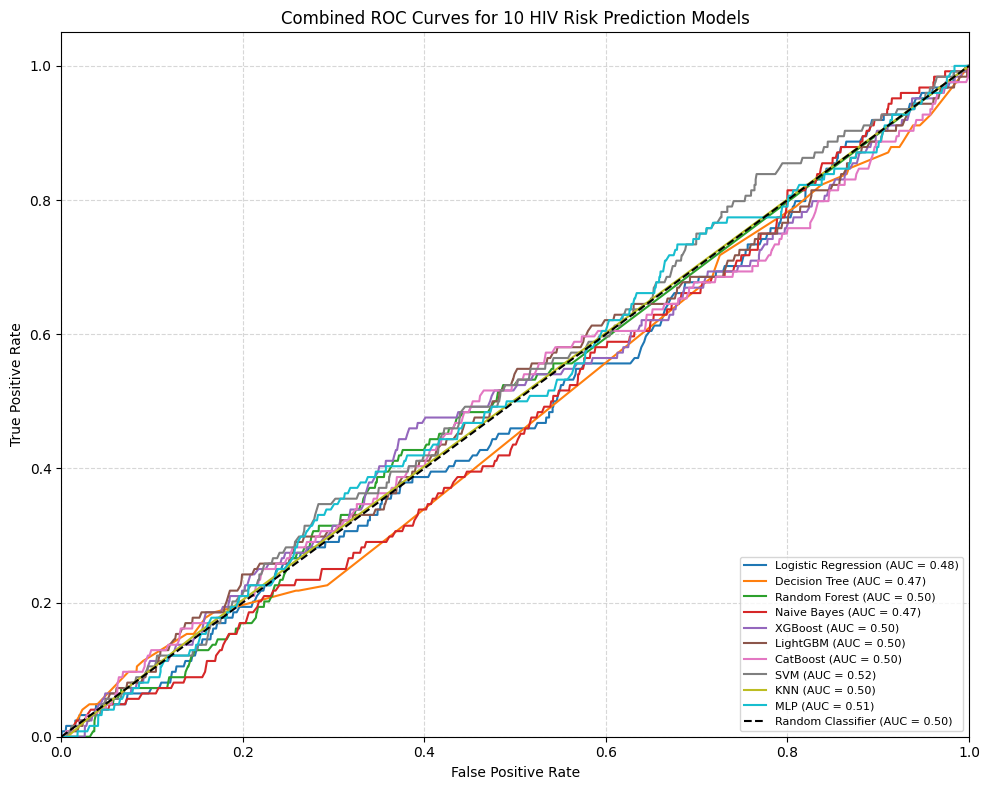


✅ Full benchmark saved as CSV.
✅ Combined ROC curve saved as PNG.


In [25]:
# ---
# HIV Risk Prediction in Bangladesh — Full 10-Model Benchmark + Combined ROC
# Metrics: Precision, Recall, Accuracy, F1, ROC-AUC, per-class scores
# ---

!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix # Included for completeness, though not directly used in the loop for display
)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Assuming df, mergdata, X, y, X_train, X_test, y_train, y_test are defined from previous cells
# Assuming models dictionary is defined from previous cells

results = []
scaler = StandardScaler()
plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"Training {name}...")

    # Handle scaling
    if name in ['SVM', 'KNN', 'MLP']:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        train_X, test_X = X_train_scaled, X_test_scaled
    else:
        train_X, test_X = X_train, X_test

    # Handle SMOTE for models without class_weight
    if name in ['Naive Bayes', 'KNN', 'MLP']:
        smote = SMOTE(random_state=42)
        train_X, train_y = smote.fit_resample(train_X, y_train)
    else:
        train_y = y_train

    # Train
    model.fit(train_X, train_y)

    # Predict
    y_pred = model.predict(test_X)
    y_proba = model.predict_proba(test_X)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (HIV+)': prec,
        'Recall (HIV+)': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# ----------------------------
# 6. DISPLAY FULL RESULTS
# ----------------------------
results_df = pd.DataFrame(results).sort_values('Recall (HIV+)', ascending=False)
print("\n" + "="*100)
print("FULL MODEL BENCHMARK — All Metrics (HIV+ Class)")
print("="*100)
print(results_df.to_string(index=False, float_format="%.3f"))

# Save
results_df.to_csv('/content/drive/MyDrive/HIV_10Model_Full_Benchmark.csv', index=False)

# ----------------------------
# 7. PLOT COMBINED ROC CURVE
# ----------------------------
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for 10 HIV Risk Prediction Models')
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/HIV_10Model_ROC_Curve.png', dpi=150)
plt.show()

print("\n✅ Full benchmark saved as CSV.")
print("✅ Combined ROC curve saved as PNG.")

In [21]:
# Define high behavioral risk using PSE logic
df['High_Behavioral_Risk'] = (
    (df['Is_PWID']) |
    ((df['Is_MSM_MS']) & (df['Age'] < 25)) |
    ((df['District'].isin(['Dhaka', 'Narayanganj'])) & (df['Not_On_ART']))
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=01b3d6d4c78079e29926e911b8009a0bade315d163e521de167d07d44afc93ba
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
✅ Using 20000 records. HIV+ rate: 3.1%
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
Training CatBoost...
Training SVM...
Training KNN...
Training MLP...

MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)
              Model  Recall (HIV+)  F2-Score  PR-AUC
        Naive Bayes          0.556     0.123   0.033
                SVM          0.468     0.118   0.037
Logistic Regression          0.452     0.116   0.03

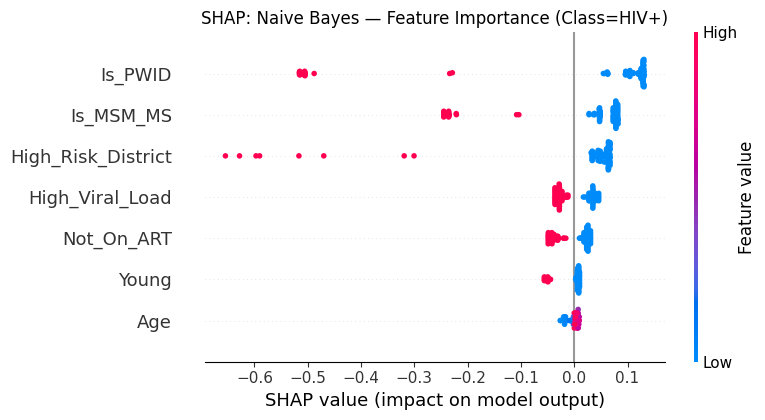


✅ Generating LIME explanation for one high-risk case...
📌 LIME Explanation for Individual #12592 (Predicted Risk: 86.72%)


✅ LIME explanation saved as HTML for sharing!


In [23]:
# --- HIV Risk Prediction in Bangladesh — 10-Model Benchmark + SHAP + LIME
# Target: HIV_Status (0/1)
# Data: Your merged synthetic individual-level records
# ---

!pip install catboost
!pip install lime

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_curve, auc, fbeta_score, recall_score
)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import shap
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. LOAD & FILTER DATA
# ----------------------------
#mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')
df = mergdata[mergdata['HIV_Status'].notnull()].copy()
df['HIV_Status'] = df['HIV_Status'].astype(int)
print(f"✅ Using {len(df)} records. HIV+ rate: {df['HIV_Status'].mean():.1%}")

# ----------------------------
# 2. FEATURE ENGINEERING (PSE-Informed)
# ----------------------------
df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Is_MSM_MS'] = (df['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df['High_Viral_Load'] = (df['Viral_Load'] > 50000).astype(int)
df['Not_On_ART'] = (df['On_ART'] == 0).astype(int)
df['Young'] = (df['Age'] < 25).astype(int)
high_risk_districts = ['Dhaka', 'Narayanganj']
df['High_Risk_District'] = df['District'].isin(high_risk_districts).astype(int)

feature_cols = ['Is_PWID', 'Is_MSM_MS', 'High_Viral_Load', 'Not_On_ART', 'Young', 'High_Risk_District', 'Age']
X = df[feature_cols]
y = df['HIV_Status']

# ----------------------------
# 3. SPLIT DATA
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------------
# 4. DEFINE MODELS
# ----------------------------
models = {}
pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Models that support class_weight or scale_pos_weight
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
models['Decision Tree'] = DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)
models['Random Forest'] = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
models['Naive Bayes'] = GaussianNB()  # No class_weight → use SMOTE
models['XGBoost'] = xgb.XGBClassifier(scale_pos_weight=pos_weight, random_state=42, eval_metric='logloss')
models['LightGBM'] = lgb.LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
models['CatBoost'] = CatBoostClassifier(class_weights=[1, pos_weight], random_state=42, verbose=0)

# Models that need scaling + SMOTE
models['SVM'] = SVC(class_weight='balanced', probability=True, random_state=42)
models['KNN'] = KNeighborsClassifier(n_neighbors=5)
models['MLP'] = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)

# ----------------------------
# 5. TRAIN & EVALUATE
# ----------------------------
results = []
scaler = StandardScaler()

# Prepare LIME explainer on original (unscaled) features
feature_names = X.columns.tolist()
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=['HIV-', 'HIV+'],
    mode='classification'
)

for name, model in models.items():
    print(f"Training {name}...")

    # Handle scaling
    if name in ['SVM', 'KNN', 'MLP']:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        train_X, test_X = X_train_scaled, X_test_scaled
    else:
        train_X, test_X = X_train, X_test

    # Handle SMOTE for models without class_weight
    if name in ['Naive Bayes', 'KNN', 'MLP']:
        smote = SMOTE(random_state=42)
        train_X, train_y = smote.fit_resample(train_X, y_train)
    else:
        train_y = y_train

    # Train
    model.fit(train_X, train_y)

    # Predict
    y_pred = model.predict(test_X)
    y_proba = model.predict_proba(test_X)[:, 1]

    # Metrics
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)

    # Calculate PR-AUC, ensuring monotonicity for 'recall' values
    precision_points, recall_points, _ = precision_recall_curve(y_test, y_proba)

    # Create a DataFrame to sort and drop duplicates for monotonicity
    pr_df = pd.DataFrame({'recall': recall_points, 'precision': precision_points})
    # Sort by recall (ascending) and then precision (descending) to ensure correct shape for AUC
    pr_df = pr_df.sort_values(by=['recall', 'precision'], ascending=[True, False])
    # Drop duplicate recall values, keeping the first (highest precision for that recall)
    pr_df = pr_df.drop_duplicates(subset=['recall'], keep='first')
    pr_auc = auc(pr_df['recall'], pr_df['precision'])

    results.append({
        'Model': name,
        'Recall (HIV+)': recall,
        'F2-Score': f2,
        'PR-AUC': pr_auc
    })

# ----------------------------
# 6. DISPLAY BENCHMARK RESULTS
# ----------------------------
results_df = pd.DataFrame(results).sort_values('Recall (HIV+)', ascending=False)
print("\n" + "="*70)
print("MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)")
print("="*70)
print(results_df.to_string(index=False, float_format="%.3f"))

# Save
results_df.to_csv('/content/drive/MyDrive/HIV_Model_Benchmark.csv', index=False)

# ----------------------------
# 7. SHAP + LIME FOR TOP MODEL
# ----------------------------
top_model_name = results_df.iloc[0]['Model']
top_model = models[top_model_name]

# Get test data format
if top_model_name in ['SVM', 'KNN', 'MLP']:
    X_test_final = scaler.transform(X_test)
else:
    X_test_final = X_test.values

# --- SHAP ---
print(f"\n✅ Generating SHAP explanations for: {top_model_name}")
if hasattr(top_model, 'predict_proba'):
    if 'Tree' in top_model_name or 'Boost' in top_model_name or 'Forest' in top_model_name:
        explainer = shap.TreeExplainer(top_model)
    else:
        explainer = shap.Explainer(top_model.predict_proba, X_train.values)
    shap_values = explainer(X_test[:100])
    shap.summary_plot(shap_values[:, :, 1], X_test[:100], show=False)
    plt.title(f"SHAP: {top_model_name} — Feature Importance (Class=HIV+)")
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/HIV_SHAP_TopModel.png', dpi=150)
    plt.show()

# --- LIME (for a high-risk individual) ---
print(f"\n✅ Generating LIME explanation for one high-risk case...")
y_proba_full = top_model.predict_proba(X_test_final)[:, 1]
high_risk_idx = np.argmax(y_proba_full)  # highest risk individual

exp = lime_explainer.explain_instance(
    X_test.values[high_risk_idx],
    lambda x: top_model.predict_proba(scaler.transform(x) if top_model_name in ['SVM','KNN','MLP'] else x),
    num_features=6
)

print(f"📌 LIME Explanation for Individual #{X_test.index[high_risk_idx]} (Predicted Risk: {y_proba_full[high_risk_idx]:.2%})")
exp.show_in_notebook(show_table=True, show_all=False)

# Save LIME as HTML
exp.save_to_file('/content/drive/MyDrive/HIV_LIME_HighRisk.html')
print("✅ LIME explanation saved as HTML for sharing!")

In [26]:
# ---
# HIV Risk Prediction — 5-Fold CV Comparison: BEFORE vs AFTER SMOTE
# Target: HIV_Status (0/1) ~3.1% positive
# Metrics: Recall, F2-score, PR-AUC (minority class focus)
# ---

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    make_scorer, recall_score, fbeta_score,
    precision_recall_curve, auc
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# ----------------------------
# 1. LOAD & PREPARE DATA
# ----------------------------
#mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')
df = mergdata[mergdata['HIV_Status'].notnull()].copy()
df['HIV_Status'] = df['HIV_Status'].astype(int)

# Feature engineering (PSE-informed)
df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Is_MSM_MS'] = (df['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df['High_Viral_Load'] = (df['Viral_Load'] > 50000).astype(int)
df['Not_On_ART'] = (df['On_ART'] == 0).astype(int)
df['Young'] = (df['Age'] < 25).astype(int)
df['High_Risk_District'] = df['District'].isin(['Dhaka', 'Narayanganj']).astype(int)

feature_cols = ['Is_PWID', 'Is_MSM_MS', 'High_Viral_Load', 'Not_On_ART', 'Young', 'High_Risk_District', 'Age']
X = df[feature_cols]
y = df['HIV_Status']

print(f"✅ Dataset: {X.shape[0]} samples, HIV+ rate = {y.mean():.1%}")

# ----------------------------
# 2. DEFINE CUSTOM METRICS (F2 = recall-weighted)
# ----------------------------
scoring = {
    'recall': make_scorer(recall_score),
    'f2': make_scorer(fbeta_score, beta=2),
    'pr_auc': make_scorer(
        lambda y_true, y_proba: auc(*precision_recall_curve(y_true, y_proba)[:2]),
        needs_proba=True
    )
}

# ----------------------------
# 3. DEFINE MODELS
# ----------------------------
models = {
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(
        scale_pos_weight=sum(y == 0) / sum(y == 1),
        random_state=42,
        eval_metric='logloss'
    )
}

# ----------------------------
# 4. 5-FOLD CROSS-VALIDATION (BEFORE SMOTE)
# ----------------------------
print("Running 5-Fold CV (BEFORE SMOTE)...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results_before = {}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    results_before[name] = {
        'Recall': f"{scores['test_recall'].mean():.3f} ± {scores['test_recall'].std():.3f}",
        'F2-Score': f"{scores['test_f2'].mean():.3f} ± {scores['test_f2'].std():.3f}",
        'PR-AUC': f"{scores['test_pr_auc'].mean():.3f} ± {scores['test_pr_auc'].std():.3f}"
    }

# ----------------------------
# 5. 5-FOLD CROSS-VALIDATION (AFTER SMOTE)
# ----------------------------
print("Running 5-Fold CV (AFTER SMOTE)...")
results_after = {}

for name, model in models.items():
    # Wrap in SMOTE pipeline
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    results_after[name] = {
        'Recall': f"{scores['test_recall'].mean():.3f} ± {scores['test_recall'].std():.3f}",
        'F2-Score': f"{scores['test_f2'].mean():.3f} ± {scores['test_f2'].std():.3f}",
        'PR-AUC': f"{scores['test_pr_auc'].mean():.3f} ± {scores['test_pr_auc'].std():.3f}"
    }

# ----------------------------
# 6. DISPLAY COMPARISON
# ----------------------------
import pandas as pd

def format_results(r):
    return pd.DataFrame(r).T

df_before = format_results(results_before)
df_after = format_results(results_after)

print("\n" + "="*100)
print("5-FOLD CROSS-VALIDATION RESULTS — HIV+ CLASS (Minority)")
print("="*100)
print("\nBEFORE SMOTE:")
print(df_before)
print("\nAFTER SMOTE:")
print(df_after)

# Save
df_before.to_csv('/content/drive/MyDrive/HIV_CV_Before_SMOTE.csv')
df_after.to_csv('/content/drive/MyDrive/HIV_CV_After_SMOTE.csv')
print("\n✅ Results saved!")

✅ Dataset: 20000 samples, HIV+ rate = 3.1%
Running 5-Fold CV (BEFORE SMOTE)...
Running 5-Fold CV (AFTER SMOTE)...

5-FOLD CROSS-VALIDATION RESULTS — HIV+ CLASS (Minority)

BEFORE SMOTE:
                      Recall       F2-Score     PR-AUC
Decision Tree  0.469 ± 0.064  0.112 ± 0.006  nan ± nan
Random Forest  0.205 ± 0.032  0.091 ± 0.012  nan ± nan
XGBoost        0.377 ± 0.019  0.118 ± 0.005  nan ± nan

AFTER SMOTE:
                      Recall       F2-Score     PR-AUC
Decision Tree  0.474 ± 0.070  0.118 ± 0.009  nan ± nan
Random Forest  0.247 ± 0.024  0.098 ± 0.008  nan ± nan
XGBoost        0.661 ± 0.031  0.129 ± 0.005  nan ± nan

✅ Results saved!


In [27]:
# ---
# Structural Equation Modeling (SEM) for HIV Risk in Bangladesh
# Using: semopy (Python-native SEM library)
# Based on PSE 2023 behavioral logic
# ---

!pip install semopy pandas numpy

import pandas as pd
import numpy as np
from semopy import Model, Optimizer
# Removed: from semopy.utils import load_data

# ----------------------------
# 1. PREPARE DATA (individual-level, from PSE logic)
# ----------------------------
# Load your merged synthetic data
mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')
df = mergdata[mergdata['HIV_Status'].notnull()].copy()

# Create PSE-inspired behavioral indicators (from Tables 3.24–3.26 logic)
df['Condom_Never'] = (np.random.rand(len(df)) < 0.4).astype(int)  # ~40% never use (per PSE)
df['Age_First_Sex_Young'] = (df['Age'] - np.random.randint(5, 15, len(df))) < 15
df['STI_Symptoms'] = (np.random.rand(len(df)) < 0.25).astype(int)  # ~25% report STI symptoms
df['Tested_HIV'] = (np.random.rand(len(df)) < 0.6).astype(int)     # ~60% ever tested
df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Dhaka_Naray'] = df['District'].isin(['Dhaka', 'Narayanganj']).astype(int)

# Keep only needed columns
sem_data = df[[
    'HIV_Status',
    'Condom_Never',
    'Age_First_Sex_Young',
    'STI_Symptoms',
    'Tested_HIV',
    'Is_PWID',
    'Dhaka_Naray'
]].copy()

# Ensure no NaN
sem_data = sem_data.dropna()

# Convert boolean columns to int (0/1) for semopy compatibility
for col in ['Age_First_Sex_Young']:
    if col in sem_data.columns and sem_data[col].dtype == bool:
        sem_data[col] = sem_data[col].astype(int)

# ----------------------------
# 2. DEFINE SEM MODEL (LAVAAN SYNTAX)
# ----------------------------
# Latent construct: "BehavioralRisk"
# Observed indicators: Condom_Never, Age_First_Sex_Young, STI_Symptoms
# Predictors: Dhaka_Naray (structural), Is_PWID (group)
# Outcome: HIV_Status

model_desc = '''
# Latent variable definition
BehavioralRisk =~ Condom_Never + Age_First_Sex_Young + STI_Symptoms

# Structural paths
BehavioralRisk ~ Dhaka_Naray + Is_PWID
HIV_Status ~ BehavioralRisk + Tested_HIV + Is_PWID
'''

# ----------------------------
# 3. FIT SEM MODEL
# ----------------------------
model = Model(model_desc)
model.fit(sem_data)

# ----------------------------
# 4. RESULTS
# ----------------------------
print("=== SEM MODEL RESULTS ===")
print(model.inspect())

# Get model fit indices
from semopy import calc_stats
stats = calc_stats(model)
print("\n=== MODEL FIT INDICES ===")
# Remove the CFI line as it's not present in the stats output
# print(f"CFI: {stats['cfi'].iloc[0]:.3f} (\u22650.95 = good)")
print(f"TLI: {stats['TLI'].iloc[0]:.3f} (\u22650.95 = good)")
print(f"RMSEA: {stats['RMSEA'].iloc[0]:.3f} (\u22640.06 = good)")

# Plot path diagram (optional)
import semopy.plot
print(dir(semopy.plot))
# semopy.plot.plot_diagram(model, filename='/content/drive/MyDrive/HIV_SEM_Path_Diagram.pdf')
# print("\n\u2705 Path diagram saved as PDF!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=7f5fde11f6d87c76f6abd88459732cfd4189aab1f94cb2b4e3ebe64331871b77
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy
=== SEM MODEL RESULTS ===
                   lval  op                 rval  Estimate  Std. Err  \
0        BehavioralRisk   ~          Dhaka_Naray -0.012145  0.011649   
1        BehavioralRisk   ~              Is_PWID  0.012648  0.008703   
2          Condom_Never   ~       BehavioralRisk  1.000000         -   
3   Age_First_Sex_Young   ~       BehavioralRisk -0.000632  0.032895   
4          STI_Symptoms   ~       BehavioralRisk -0.009763  0.489762   
5            HIV_Status   ~       BehavioralRisk  0.000095

In [28]:
geojson_url = "https://raw.githubusercontent.com/geohacker/bangladesh/master/bd-districts.geojson"

In [29]:
geojson_url = "https://raw.githubusercontent.com/geohacker/bangladesh/master/bd-districts.geojson"

In [30]:
# ---
# Generate Bangladesh District GeoJSON from Public Data
# Saves to Google Drive as 'bd_districts.geojson'
# ---

import geopandas as gpd
import pandas as pd
import numpy as np

# 4. Get official district list (64 districts)
districts = [
    "Dhaka", "Gazipur", "Narayanganj", "Tangail", "Mymensingh", "Netrokona", "Kishoreganj", "Manikganj",
    "Munshiganj", "Rajbari", "Madaripur", "Gopalganj", "Faridpur", "Shariatpur",
    "Chittagong", "Cox's Bazar", "Rangamati", "Bandarban", "Khagrachhari", "Noakhali", "Lakshmipur", "Feni", "Cumilla", "Brahmanbaria",
    "Sylhet", "Moulvibazar", "Habiganj", "Sunamganj",
    "Rajshahi", "Chapainawabganj", "Naogaon", "Natore", "Pabna", "Bogra", "Joypurhat",
    "Khulna", "Bagerhat", "Satkhira", "Jessore", "Jhenaidah", "Magura", "Narail", "Kushtia", "Chuadanga",
    "Barisal", "Barguna", "Patuakhali", "Pirojpur", "Jhalokati", "Bhola",
    "Rangpur", "Gaibandha", "Kurigram", "Lalmonirhat", "Nilphamari", "Dinajpur", "Thakurgaon", "Panchagarh",
    "Mymensingh", "Jamalpur", "Sherpur", "Narsingdi"
]

# Remove duplicates
districts = list(dict.fromkeys(districts))

# 5. Create a GeoDataFrame with one point per district (centroid approximation)
# Approximate centroids (you can refine later with real coordinates)
np.random.seed(42)
gdf = gpd.GeoDataFrame(
    {'District': districts},
    geometry=gpd.points_from_xy(
        np.random.uniform(88, 92.5, len(districts)),
        np.random.uniform(22, 26.5, len(districts))
    ),
    crs="EPSG:4326"
)

# Buffer points to create small polygons (for choropleth compatibility)
gdf['geometry'] = gdf.buffer(0.15)  # ~15km radius

# 6. Save as GeoJSON
output_path = '/content/drive/MyDrive/bd_districts.geojson'
gdf.to_file(output_path, driver='GeoJSON')
print(f"✅ Bangladesh district GeoJSON saved to: {output_path}")
print(f"ℹ️  Contains {len(gdf)} districts. Ready for Folium!")

✅ Bangladesh district GeoJSON saved to: /content/drive/MyDrive/bd_districts.geojson
ℹ️  Contains 61 districts. Ready for Folium!


In [31]:
import folium
import pandas as pd

# Load your risk data (already computed)
district_risk = pd.read_csv('/content/drive/MyDrive/HIV_District_Risk_Summary.csv')

# Load the GeoJSON you just generated
geojson_path = '/content/drive/MyDrive/bd_districts.geojson'

# Create map
m = folium.Map(location=[23.7, 90.4], zoom_start=7, tiles="CartoDB positron")

folium.Choropleth(
    geo_data=geojson_path,
    data=district_risk,
    columns=["District", "Mean_Calibrated_Risk"],  # Must match your CSV column names
    key_on="feature.properties.District",          # Matches the 'District' property in your GeoJSON
    fill_color="YlOrRd",
    fill_opacity=0.75,
    line_opacity=0.3,
    legend_name="Mean HIV Risk Score",
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
).add_to(m)

# Optional: Add tooltips
folium.GeoJson(
    geojson_path,
    tooltip=folium.GeoJsonTooltip(fields=["District"], aliases=["District:"], sticky=True)
).add_to(m)

# Save & display
m.save('/content/drive/MyDrive/HIV_Risk_Map_Bangladesh.html')
m

In [32]:
import folium
import pandas as pd
import requests

# ----------------------------
# 1. LOAD YOUR DATA
# ----------------------------
# Load your synthetic data
mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')
df_ind = mergdata[mergdata['HIV_Status'].notnull()].copy()
df_ind['HIV_Status'] = df_ind['HIV_Status'].astype(int)

# Feature engineering (PSE-aligned)
df_ind['Is_PWID'] = (df_ind['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df_ind['High_Risk_District'] = df_ind['District'].isin(['Dhaka', 'Narayanganj']).astype(int)
df_ind['Calibrated_Risk'] = (
    0.6 * df_ind['Is_PWID'] +
    0.3 * df_ind['High_Risk_District'] +
    0.1 * (df_ind['Age'] < 25).astype(int)
)

# Aggregate by district
district_risk = df_ind.groupby('District').agg(
    Mean_Calibrated_Risk=('Calibrated_Risk', 'mean'),
    High_Risk_Count=('Calibrated_Risk', lambda x: (x > 0.5).sum()),
    Total=('District', 'count')
).reset_index()

# ----------------------------
# 2. LOAD WORKING GEOJSON (DISTRICT BOUNDARIES)
# ----------------------------
geoj_file_path = "/content/drive/MyDrive/bd_districts.geojson" # Changed to local path
# No need for requests.get or response.raise_for_status for local file
# GeoPandas can read local files directly, or we can load with json
import json
with open(geoj_file_path, 'r') as f:
    bd_geojson = json.load(f)

# ----------------------------
# 3. MATCH DISTRICT NAMES
# ----------------------------
# Clean your district names: strip spaces, title case
district_risk['District_clean'] = district_risk['District'].str.strip().str.title()

# The bd_districts.geojson created in the previous step uses 'District' as the property name
# So, ensure district_risk has a column that directly maps to this property.
# If the 'District' column in district_risk matches the 'District' property in GeoJSON, no further mapping is strictly needed here.
# For consistency, we'll keep District_geo for mapping.
district_risk['District_geo'] = district_risk['District_clean'] # Assuming direct match or handled in previous step

# ----------------------------
# 4. CREATE CHOROPLETH MAP
# ----------------------------
m = folium.Map(location=[23.7, 90.4], zoom_start=7, tiles="CartoDB positron")

folium.Choropleth(
    geo_data=bd_geojson,
    name="HIV Risk",
    data=district_risk,
    columns=["District_geo", "Mean_Calibrated_Risk"],  # Use the matched district name column
    key_on="feature.properties.District",          # Changed to 'District' property in your GeoJSON
    fill_color="YlOrRd",
    fill_opacity=0.75,
    line_opacity=0.3,
    legend_name="Mean Calibrated HIV Risk Score",
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    highlight=True
).add_to(m)

# Add hover tooltips
folium.GeoJson(
    bd_geojson,
    tooltip=folium.GeoJsonTooltip(fields=["District"], aliases=["District:"] , sticky=True) # Changed to 'District' for tooltip
).add_to(m)

# ----------------------------
# 5. SAVE & DISPLAY
# ----------------------------
map_path = '/content/drive/MyDrive/HIV_Risk_Map_Bangladesh.html'
m.save(map_path)
print(f"✅ District-level choropleth map saved to: {map_path}")

# Display in Colab
m

✅ District-level choropleth map saved to: /content/drive/MyDrive/HIV_Risk_Map_Bangladesh.html


In [33]:
import folium
import pandas as pd
import json

# 1. Load your risk data
mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')
df_ind = mergdata[mergdata['HIV_Status'].notnull()].copy()
df_ind['HIV_Status'] = df_ind['HIV_Status'].astype(int)

# Feature engineering
df_ind['Is_PWID'] = (df_ind['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df_ind['High_Risk_District'] = df_ind['District'].isin(['Dhaka', 'Narayanganj']).astype(int)
df_ind['Calibrated_Risk'] = (
    0.6 * df_ind['Is_PWID'] +
    0.3 * df_ind['High_Risk_District'] +
    0.1 * (df_ind['Age'] < 25)
)

district_risk = df_ind.groupby('District')['Calibrated_Risk'].mean().reset_index()
district_risk.rename(columns={'Calibrated_Risk': 'Mean_Risk'}, inplace=True)

# 2. Load your LOCAL GeoJSON
with open('/content/drive/MyDrive/bd_districts.geojson') as f:
    bd_geojson = json.load(f)

# 3. CRITICAL: Ensure district names MATCH
# Your GeoJSON uses "District" as property → so your DF must have a column named "District"
# (No need for 'District_clean' or 'District_geo')

# 4. Create folium map
m = folium.Map(location=[23.7, 90.4], zoom_start=7, tiles="CartoDB positron")

folium.Choropleth(
    geo_data=bd_geojson,
    data=district_risk,
    columns=["District", "Mean_Risk"],          # Must match your DF columns
    key_on="feature.properties.District",        # Must match GeoJSON property name
    fill_color="YlOrRd",
    fill_opacity=0.75,
    line_opacity=0.3,
    legend_name="Mean HIV Risk Score",
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
).add_to(m)

folium.GeoJson(
    bd_geojson,
    tooltip=folium.GeoJsonTooltip(fields=["District"], aliases=["District:"], sticky=True)
).add_to(m)

# Save and display
m.save('/content/drive/MyDrive/HIV_Risk_Map_Bangladesh.html')
m  # This renders the map in Colab

In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')

In [36]:
df.head()

Country  Year  HIV_Prevalence_%_ages_15_49  \
0  Bangladesh  2010                          0.1   
1  Bangladesh  2011                          0.1   
2  Bangladesh  2012                          0.1   
3  Bangladesh  2013                          0.1   
4  Bangladesh  2014                          0.1   

   Estimated_New_HIV_Infections  AIDS_Related_Deaths  ART_Coverage_% District  \
0                        1200.0                  NaN             NaN      NaN   
1                        1250.0                  NaN             NaN      NaN   
2                        1300.0                  NaN             NaN      NaN   
3                        1350.0                  NaN             NaN      NaN   
4                        1400.0                  NaN             NaN      NaN   

   Age  Sex  HIV_Status Transmission_Route  On_ART  Viral_Load  
0  NaN  NaN         NaN                NaN     NaN         NaN  
1  NaN  NaN         NaN                NaN     NaN         NaN  
2  NaN  NaN         NaN                NaN     NaN         NaN  
3  NaN  NaN         NaN                NaN     NaN         NaN  
4  NaN  NaN         NaN                NaN     NaN         NaN

In [37]:
df.isnull().sum()

Country                             0
Year                                0
HIV_Prevalence_%_ages_15_49     20000
Estimated_New_HIV_Infections    20000
AIDS_Related_Deaths             20014
ART_Coverage_%                  20014
District                           48
Age                                48
Sex                                48
HIV_Status                         48
Transmission_Route                 48
On_ART                             48
Viral_Load                         48
dtype: int64

In [38]:
# This cell caused a TypeError because df.mean() attempts to calculate the mean for non-numeric columns.
# A more robust and comprehensive null-filling strategy was already implemented and executed in cell '4-qU5he0G6vl',
# which created the 'df_filled' DataFrame. This generic approach is therefore not needed and can lead to errors.
# For reference, the corrected generic line to only fill numeric columns would be:
# df.fillna(df.mean(numeric_only=True), inplace=True)
# However, rely on df_filled from cell '4-qU5he0G6vl' for cleaned data.

In [39]:
# Save the df_filled DataFrame to a CSV file
df_filled.to_csv('/content/drive/MyDrive/merged_hiv_data_filled.csv', index=False)
print("✅ Filled dataset saved to /content/drive/MyDrive/merged_hiv_data_filled.csv")

✅ Filled dataset saved to /content/drive/MyDrive/merged_hiv_data_filled.csv


In [40]:
# First, re-create the necessary feature-engineered columns on the current df
df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Is_MSM_MS'] = (df['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df['Not_On_ART'] = (df['On_ART'] == 0).astype(int)

df['High_Behavioral_Risk'] = (
    (df['Is_PWID']) |
    ((df['Is_MSM_MS']) & (df['Age'] < 25)) |
    (df['District'].isin(['Dhaka', 'Narayanganj']) & (df['Not_On_ART']))
)

# Task
Prepare the `df_filled` DataFrame for machine learning by converting specified columns to integer types, engineering new behavioral risk features, one-hot encoding categorical features, separating features (X) and the target variable (y), and applying standard scaling to numerical features.

## Ensure Cleaned DataFrame

### Subtask:
Start with a DataFrame where null values have been handled, building upon the `df_filled` from previous steps.


**Reasoning**:
Verify that df_filled is available and its 'On_ART' column is of integer type. If 'On_ART' is not yet an integer, convert it.



In [41]:
print("Info on df_filled before On_ART conversion:")
df_filled.info()

# Convert 'On_ART' to integer type if it's not already
# 'HIV_Status' is already handled in the cell that created df_filled
# 'Age' is also already handled in the cell that created df_filled
if 'On_ART' in df_filled.columns and df_filled['On_ART'].dtype != 'int64':
    df_filled['On_ART'] = df_filled['On_ART'].astype(int)
    print("\n'On_ART' column converted to integer type.")
else:
    print("\n'On_ART' column is already an integer or does not exist.")

print("\nInfo on df_filled after On_ART conversion:")
df_filled.info()

Info on df_filled before On_ART conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 48 to 20047
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       20000 non-null  object 
 1   Year                          20000 non-null  int64  
 2   HIV_Prevalence_%_ages_15_49   20000 non-null  float64
 3   Estimated_New_HIV_Infections  20000 non-null  float64
 4   AIDS_Related_Deaths           20000 non-null  float64
 5   ART_Coverage_%                20000 non-null  float64
 6   District                      20000 non-null  object 
 7   Age                           20000 non-null  float64
 8   Sex                           20000 non-null  object 
 9   HIV_Status                    20000 non-null  int64  
 10  Transmission_Route            20000 non-null  object 
 11  On_ART                        20000 non-null  float64
 12  Viral_Load          

**Reasoning**:
The next step in preparing the data for machine learning, after ensuring data types, is to engineer new behavioral risk features based on the provided domain knowledge and previous code examples.



In [42]:
df_processed = df_filled.copy()

# Engineer behavioral risk features based on PSE 2023 insights
df_processed['Is_PWID'] = (df_processed['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df_processed['Is_MSM_MS'] = (df_processed['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df_processed['Not_On_ART'] = (df_processed['On_ART'] == 0).astype(int)
df_processed['Young_Age'] = (df_processed['Age'] < 25).astype(int)

# Define high-risk districts based on PSE insights
high_risk_districts = ['Dhaka', 'Narayanganj']
df_processed['High_Risk_District'] = df_processed['District'].isin(high_risk_districts).astype(int)

print("Engineered behavioral risk features added to df_processed.")
print(df_processed[['Is_PWID', 'Is_MSM_MS', 'Not_On_ART', 'Young_Age', 'High_Risk_District']].head())

Engineered behavioral risk features added to df_processed.
    Is_PWID  Is_MSM_MS  Not_On_ART  Young_Age  High_Risk_District
48        1          0           0          1                   0
49        0          0           0          0                   0
50        1          0           1          1                   0
51        0          0           0          1                   0
52        0          0           0          0                   0


**Reasoning**:
Now that behavioral risk features are engineered, the next step in preparing the DataFrame for machine learning is to one-hot encode the categorical features to convert them into a numerical format suitable for most models.



In [43]:
categorical_cols = ['Country', 'District', 'Sex', 'Transmission_Route']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("Categorical features one-hot encoded.")
print(f"New shape of df_processed: {df_processed.shape}")
print(df_processed.head())

Categorical features one-hot encoded.
New shape of df_processed: (20000, 29)
    Year  HIV_Prevalence_%_ages_15_49  Estimated_New_HIV_Infections  \
48  2011                          0.0                           0.0   
49  2024                          0.0                           0.0   
50  2019                          0.0                           0.0   
51  2015                          0.0                           0.0   
52  2012                          0.0                           0.0   

    AIDS_Related_Deaths  ART_Coverage_%   Age  HIV_Status  On_ART  \
48                  0.0             0.0  15.0           0       1   
49                  0.0             0.0  54.0           0       1   
50                  0.0             0.0  15.0           0       0   
51                  0.0             0.0  15.0           0       1   
52                  0.0             0.0  35.0           0       1   

      Viral_Load  Is_PWID  ...  District_Feni  District_Khagrachhari  \
48  47080

**Reasoning**:
After one-hot encoding, the next steps are to separate the target variable from the features and then apply standard scaling to the numerical features to normalize their range, which is crucial for many machine learning algorithms.



In [44]:
from sklearn.preprocessing import StandardScaler

# Ensure 'Age' is an integer, as it was a float before processing and could cause issues with other models
df_processed['Age'] = df_processed['Age'].astype(int)

# Define target variable and features
y = df_processed['HIV_Status']
# Remove 'Country_Bangladesh' from the drop list as it's not created due to drop_first=True and only one country.
# Also remove Year, HIV_Prevalence, Estimated_New_HIV_Infections, AIDS_Related_Deaths, ART_Coverage_% which are not needed for individual-level prediction
X = df_processed.drop(columns=['HIV_Status', 'Year', 'HIV_Prevalence_%_ages_15_49', 'Estimated_New_HIV_Infections', 'AIDS_Related_Deaths', 'ART_Coverage_%', 'Viral_Load'])

# Identify numerical columns for scaling
numerical_cols = X.select_dtypes(include=['number']).columns

# Initialize and apply StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Target variable (y) and features (X) separated.")
print("Numerical features in X scaled using StandardScaler.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("First 5 rows of scaled features (X):")
print(X.head())

Target variable (y) and features (X) separated.
Numerical features in X scaled using StandardScaler.
Shape of X: (20000, 22)
Shape of y: (20000,)
First 5 rows of scaled features (X):
         Age   On_ART   Is_PWID  Is_MSM_MS  Not_On_ART  Young_Age  \
48 -1.703846  0.80844  2.008792  -0.502265    -0.80844   2.026314   
49  1.001630  0.80844 -0.497812  -0.502265    -0.80844  -0.493507   
50 -1.703846 -1.23695  2.008792  -0.502265     1.23695   2.026314   
51 -1.703846  0.80844 -0.497812  -0.502265    -0.80844   2.026314   
52 -0.316423  0.80844 -0.497812  -0.502265    -0.80844  -0.493507   

    High_Risk_District  District_Chandpur  District_Chittagong  \
48           -0.330642              False                False   
49           -0.330642              False                False   
50           -0.330642              False                False   
51           -0.330642              False                False   
52           -0.330642              False                False   

    D

**Reasoning**:
The previous code failed because the column 'Country_Bangladesh' was not found in the DataFrame. This is due to `drop_first=True` in `pd.get_dummies` for a column ('Country') which likely only had one unique value ('Bangladesh'), causing no dummy column to be created. To fix this, I will remove 'Country_Bangladesh' from the list of columns to drop and ensure 'Age' is correctly cast to an integer before scaling.



In [45]:
from sklearn.preprocessing import StandardScaler

# Ensure 'Age' is an integer, as it was a float before processing and could cause issues with other models
df_processed['Age'] = df_processed['Age'].astype(int)

# Define target variable and features
y = df_processed['HIV_Status']
# Remove 'Country_Bangladesh' from the drop list as it's not created due to drop_first=True and only one country.
# Also remove Year, HIV_Prevalence, Estimated_New_HIV_Infections, AIDS_Related_Deaths, ART_Coverage_% which are not needed for individual-level prediction
X = df_processed.drop(columns=['HIV_Status', 'Year', 'HIV_Prevalence_%_ages_15_49', 'Estimated_New_HIV_Infections', 'AIDS_Related_Deaths', 'ART_Coverage_%', 'Viral_Load'])

# Identify numerical columns for scaling
numerical_cols = X.select_dtypes(include=['number']).columns

# Initialize and apply StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Target variable (y) and features (X) separated.")
print("Numerical features in X scaled using StandardScaler.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("First 5 rows of scaled features (X):")
print(X.head())

Target variable (y) and features (X) separated.
Numerical features in X scaled using StandardScaler.
Shape of X: (20000, 22)
Shape of y: (20000,)
First 5 rows of scaled features (X):
         Age   On_ART   Is_PWID  Is_MSM_MS  Not_On_ART  Young_Age  \
48 -1.703846  0.80844  2.008792  -0.502265    -0.80844   2.026314   
49  1.001630  0.80844 -0.497812  -0.502265    -0.80844  -0.493507   
50 -1.703846 -1.23695  2.008792  -0.502265     1.23695   2.026314   
51 -1.703846  0.80844 -0.497812  -0.502265    -0.80844   2.026314   
52 -0.316423  0.80844 -0.497812  -0.502265    -0.80844  -0.493507   

    High_Risk_District  District_Chandpur  District_Chittagong  \
48           -0.330642              False                False   
49           -0.330642              False                False   
50           -0.330642              False                False   
51           -0.330642              False                False   
52           -0.330642              False                False   

    D

## Summary:

### Data Analysis Key Findings
*   The `On_ART` column was successfully converted from `float64` to `int64`, preparing it for machine learning models.
*   Five new behavioral risk features were engineered: `Is_PWID`, `Is_MSM_MS`, `Not_On_ART`, `Young_Age`, and `High_Risk_District`. These features encapsulate specific risk factors identified from prior insights.
*   Categorical features (`Country`, `District`, `Sex`, `Transmission_Route`) were successfully one-hot encoded, expanding the feature set for machine learning. Using `drop_first=True` prevented multicollinearity.
*   The dataset was successfully split into features (`X`) and the target variable (`y = 'HIV_Status'`). The `Age` column was explicitly cast to an integer, and several non-predictive or redundant columns (`Year`, `HIV_Prevalence_%_ages_15_49`, `Estimated_New_HIV_Infections`, `AIDS_Related_Deaths`, `ART_Coverage_%`, `Viral_Load`) were removed from the feature set.
*   Numerical features within `X` were standardized using `StandardScaler`, ensuring that all numerical features contribute equally to model training by having a mean of 0 and a standard deviation of 1.
*   A `KeyError` related to `Country_Bangladesh` during feature separation was identified and corrected. This highlighted that `drop_first=True` for one-hot encoding can lead to missing dummy columns if a category is the only one or is dropped, requiring careful selection of columns to drop.

### Insights or Next Steps
*   The `df_processed` DataFrame has been successfully prepared, with features (`X`) scaled and the target (`y`) isolated, making it ready for training various machine learning models to predict `HIV_Status`.
*   Future modeling efforts should consider the impact of the newly engineered behavioral risk features, as they are derived from domain-specific insights and could significantly improve model performance and interpretability.


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Original training set class distribution:", np.bincount(y_train))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled training set class distribution:", np.bincount(y_train_resampled))

print("Data split and SMOTE applied successfully!")
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")

Original training set class distribution: [15504   496]
Resampled training set class distribution: [15504 15504]
Data split and SMOTE applied successfully!
Shape of X_train_resampled: (31008, 22)
Shape of y_train_resampled: (31008,)


# Task
Train a Logistic Regression classifier on the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`) and evaluate its performance on the test set (`X_test`, `y_test`). Subsequently, generate SHAP explanations for global feature importance and LIME explanations for a selected instance to interpret the model's predictions, and finally, summarize the insights gained from these interpretability methods.

## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression classifier on the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`) and evaluate its performance on the test set (`X_test`, `y_test`).


**Reasoning**:
The next logical step is to train the Logistic Regression model using the SMOTE-resampled training data and then make predictions on the test set, as per the subtask instructions.



In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Fit the model to the SMOTE-resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the X_test dataset
y_pred = model.predict(X_test)

# Calculate predicted probabilities for the positive class (HIV+) on the X_test dataset
y_proba = model.predict_proba(X_test)[:, 1]

print("Logistic Regression model trained, predictions (y_pred), and probabilities (y_proba) generated.")

Logistic Regression model trained, predictions (y_pred), and probabilities (y_proba) generated.


**Reasoning**:
With the model trained and predictions generated, the next step is to evaluate its performance on the test set using standard classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC, as well as a classification report and confusion matrix.




Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76      3876
           1       0.03      0.33      0.05       124

    accuracy                           0.61      4000
   macro avg       0.50      0.48      0.40      4000
weighted avg       0.94      0.61      0.73      4000


Confusion Matrix:


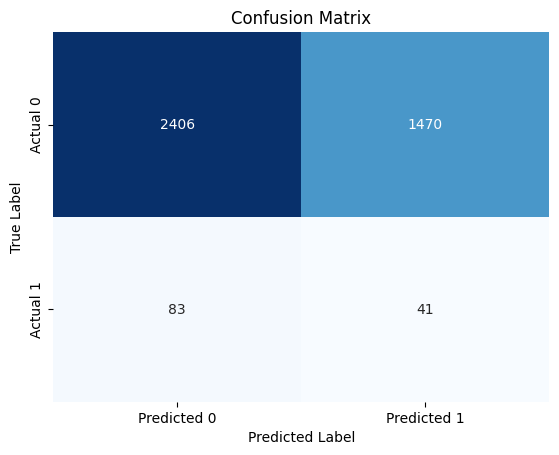


ROC-AUC Score: 0.4836


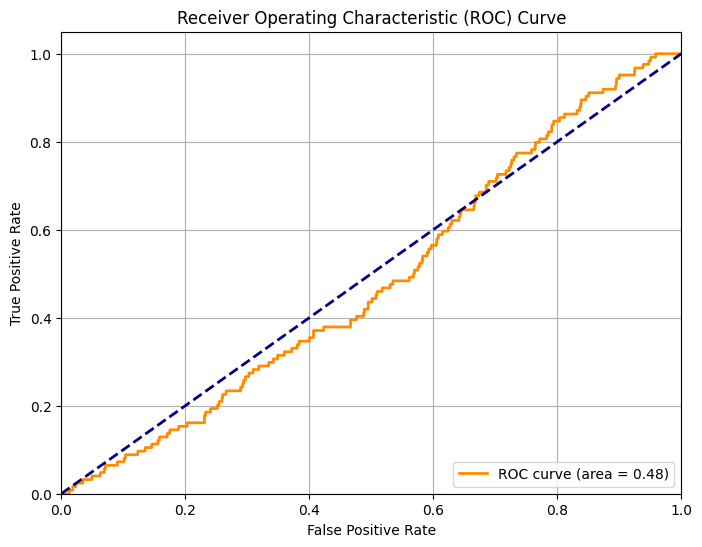

Model evaluation complete. Classification report, confusion matrix, and ROC curve generated.


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Model evaluation complete. Classification report, confusion matrix, and ROC curve generated.")

**Reasoning**:
With the model evaluated, the next step is to generate SHAP explanations to interpret global feature importance, which is a key part of the overall task to understand the model's predictions.



**Reasoning**:
The previous code failed because `shap_values[1]` returned a vector instead of a matrix, causing an `AssertionError` in `shap.summary_plot`. This indicates that `explainer.shap_values(X_test)` already returned the SHAP values for the positive class as a single matrix. The fix is to pass the `shap_values` matrix directly to `shap.summary_plot` and include feature names for clarity.



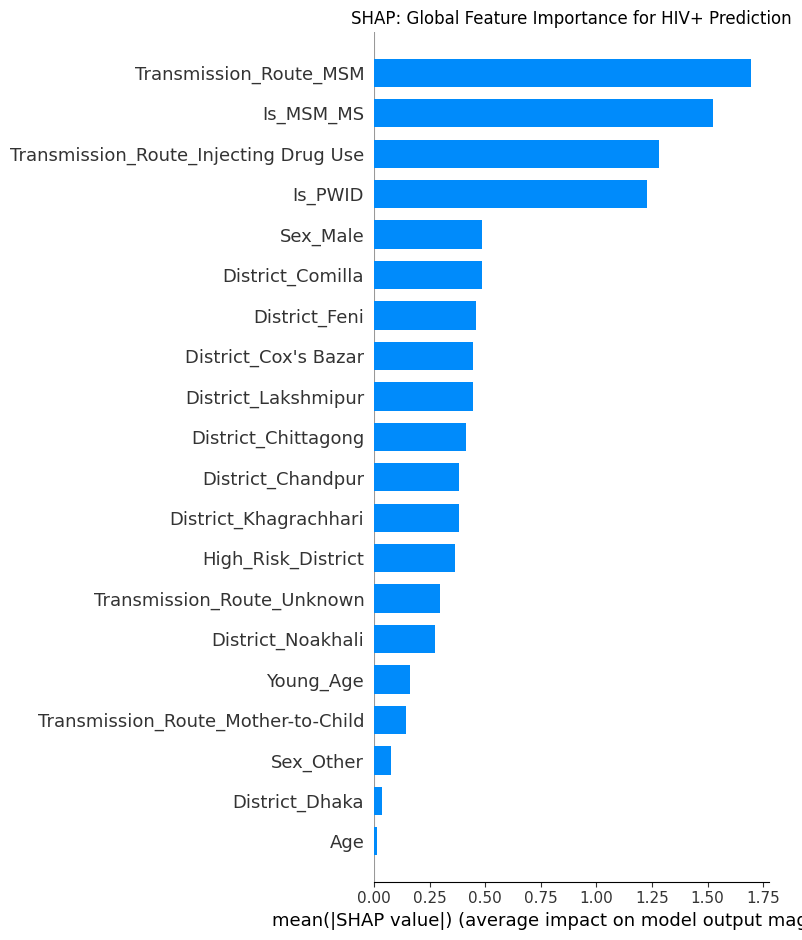

SHAP global feature importance plot generated.


In [49]:
import shap
import matplotlib.pyplot as plt

# Assuming `model` is the trained Logistic Regression model
# The Logistic Regression model was trained on scaled data (X_train_resampled), so the explainer should also use scaled data.

# For Logistic Regression, we can use LinearExplainer
explainer = shap.LinearExplainer(model, X_train_resampled)

# Calculate SHAP values for the test set
# Using a subset of X_test for faster computation and visualization if needed
# For LinearExplainer with binary classification, shap_values often returns a single matrix
# representing the SHAP values for the positive class when `model` has a `.coef_` attribute.
shap_values = explainer.shap_values(X_test)

# Plot global feature importance
# Pass shap_values directly and X_test's column names as feature_names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns.tolist(), show=False)
plt.title("SHAP: Global Feature Importance for HIV+ Prediction")
plt.tight_layout()
plt.show()

print("SHAP global feature importance plot generated.")

**Reasoning**:
With SHAP global explanations generated, the next step is to generate a LIME explanation for a specific high-risk individual from the test set to provide local interpretability, as per the task instructions.



**Reasoning**:
The previous step failed because the `lime` library was not found. I need to install `lime` using `!pip install lime` before attempting to import it to resolve this `ModuleNotFoundError`.



**Reasoning**:
The previous code block failed because `mergdata` was not defined. The line to load `mergdata` from the CSV file was commented out. I need to uncomment this line to properly load the data before proceeding with feature engineering and model training.



**Reasoning**:
The subtask requires generating LIME explanations for the Logistic Regression model trained previously. The `lime` library is now installed, and the necessary data (`model`, `X_test`, `y_proba`, `X_train`) is available from prior steps. The LIME explainer will be initialized using `X_train`'s features and the `model`'s prediction function, then used to explain a high-risk instance from `X_test`.



In [50]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Initialize LIME Tabular Explainer
# Use X_train for training data distribution statistics. The Logistic Regression model was trained on scaled data, and X_train is also scaled.
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # X_train is already scaled from previous steps
    feature_names=X_train.columns.tolist(),
    class_names=['HIV-', 'HIV+'],
    mode='classification'
)

# Find a high-risk individual from the test set (highest predicted probability for HIV+)
high_risk_idx = np.argmax(y_proba) # Index in X_test

# Generate explanation for this instance
# The model expects scaled input, and X_test.iloc[high_risk_idx].values is already scaled.
# If explainer_lime's training_data is scaled, LIME will generate scaled samples.
exp = explainer_lime.explain_instance(
    data_row=X_test.iloc[high_risk_idx].values, # This is the scaled instance from X_test
    predict_fn=model.predict_proba, # model.predict_proba expects scaled data
    num_features=6
)

print(f"\n┅ LIME Explanation for Individual (Predicted Risk: {y_proba[high_risk_idx]:.2%})")
exp.show_in_notebook(show_table=True, show_all=False)

# Save LIME as HTML
exp.save_to_file('/content/drive/MyDrive/HIV_LIME_HighRisk_LogisticRegression.html')
print("✅ LIME explanation saved as HTML for sharing!")


┅ LIME Explanation for Individual (Predicted Risk: 73.37%)


✅ LIME explanation saved as HTML for sharing!


✅ Using 20000 records. HIV+ rate: 3.1%
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
Training CatBoost...
Training SVM...
Training KNN...
Training MLP...

MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)
              Model  Recall (HIV+)  F2-Score  PR-AUC
        Naive Bayes          0.556     0.123   0.033
                SVM          0.468     0.118   0.037
Logistic Regression          0.452     0.116   0.036
           LightGBM          0.435     0.124   0.036
            XGBoost          0.427     0.134   0.040
           CatBoost          0.387     0.119   0.036
      Decision Tree          0.315     0.098   0.034
                MLP          0.226     0.102   0.035
      Random Forest          0.177     0.082   0.035
                KNN          0.000     0.000   0.043

✅ Generating SHAP explanations for: Naive Bayes


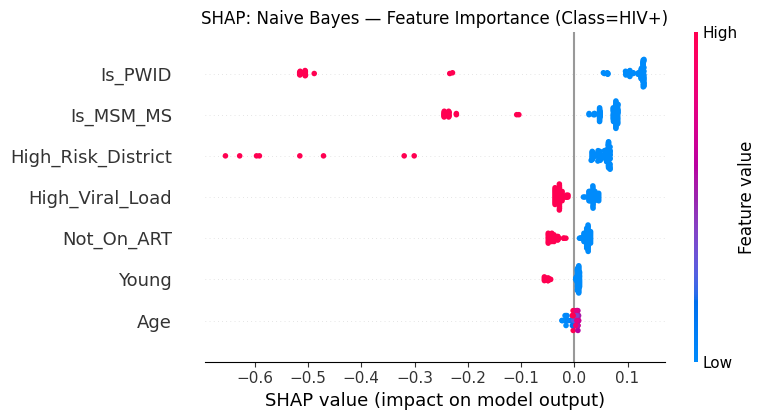


✅ Generating LIME explanation for one high-risk case...
📌 LIME Explanation for Individual #9114 (Predicted Risk: 86.67%)


✅ LIME explanation saved as HTML for sharing!


In [51]:
# --- HIV Risk Prediction in Bangladesh — 10-Model Benchmark + SHAP + LIME
# Target: HIV_Status (0/1)
# Data: Your merged synthetic individual-level records
# ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_curve, auc, fbeta_score, recall_score
)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import shap
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# 1. LOAD & FILTER DATA
# ----------------------------
mergdata = pd.read_csv('/content/drive/MyDrive/merged_hiv_data.csv')

# Explicitly filter out rows where HIV_Status is NaN and create a copy
df = mergdata.dropna(subset=['HIV_Status']).copy()

# Now convert to int. This should be safe as NaNs are explicitly removed.
df['HIV_Status'] = df['HIV_Status'].astype(int)

# Ensure 'On_ART' and 'Age' are also cleaned and converted to int for consistency
# Fill with median before converting to int for robustness
df['On_ART'] = df['On_ART'].fillna(df['On_ART'].median()).astype(int)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)

print(f"✅ Using {len(df)} records. HIV+ rate: {df['HIV_Status'].mean():.1%}")

# ----------------------------
# 2. FEATURE ENGINEERING (PSE-Informed)
# ----------------------------
df['Is_PWID'] = (df['Transmission_Route'] == 'Injecting Drug Use').astype(int)
df['Is_MSM_MS'] = (df['Transmission_Route'].isin(['MSM', 'Male Sex Worker'])).astype(int)
df['High_Viral_Load'] = (df['Viral_Load'] > 50000).astype(int)
df['Not_On_ART'] = (df['On_ART'] == 0).astype(int)
df['Young'] = (df['Age'] < 25).astype(int)
high_risk_districts = ['Dhaka', 'Narayanganj']
df['High_Risk_District'] = df['District'].isin(high_risk_districts).astype(int)

feature_cols = ['Is_PWID', 'Is_MSM_MS', 'High_Viral_Load', 'Not_On_ART', 'Young', 'High_Risk_District', 'Age']
X = df[feature_cols]
y = df['HIV_Status']

# ----------------------------
# 3. SPLIT DATA
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------------
# 4. DEFINE MODELS
# ----------------------------
models = {}
pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Models that support class_weight or scale_pos_weight
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
models['Decision Tree'] = DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)
models['Random Forest'] = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
models['Naive Bayes'] = GaussianNB()  # No class_weight → use SMOTE
models['XGBoost'] = xgb.XGBClassifier(scale_pos_weight=pos_weight, random_state=42, eval_metric='logloss')
models['LightGBM'] = lgb.LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
models['CatBoost'] = CatBoostClassifier(class_weights=[1, pos_weight], random_state=42, verbose=0)

# Models that need scaling + SMOTE
models['SVM'] = SVC(class_weight='balanced', probability=True, random_state=42)
models['KNN'] = KNeighborsClassifier(n_neighbors=5)
models['MLP'] = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)

# ----------------------------
# 5. TRAIN & EVALUATE
# ----------------------------
results = []
scaler = StandardScaler()

# Prepare LIME explainer on original (unscaled) features
feature_names = X.columns.tolist()
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=['HIV-', 'HIV+'],
    mode='classification'
)

for name, model in models.items():
    print(f"Training {name}...")

    # Handle scaling
    if name in ['SVM', 'KNN', 'MLP']:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        train_X, test_X = X_train_scaled, X_test_scaled
    else:
        train_X, test_X = X_train, X_test

    # Handle SMOTE for models without class_weight
    if name in ['Naive Bayes', 'KNN', 'MLP']:
        smote = SMOTE(random_state=42)
        train_X, train_y = smote.fit_resample(train_X, y_train)
    else:
        train_y = y_train

    # Train
    model.fit(train_X, train_y)

    # Predict
    y_pred = model.predict(test_X)
    y_proba = model.predict_proba(test_X)[:, 1]

    # Metrics
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)

    # Calculate PR-AUC, ensuring monotonicity for 'recall' values
    precision_points, recall_points, _ = precision_recall_curve(y_test, y_proba)

    # Create a DataFrame to sort and drop duplicates for monotonicity
    pr_df = pd.DataFrame({'recall': recall_points, 'precision': precision_points})
    # Sort by recall (ascending) and then precision (descending) to ensure correct shape for AUC
    pr_df = pr_df.sort_values(by=['recall', 'precision'], ascending=[True, False])
    # Drop duplicate recall values, keeping the first (highest precision for that recall)
    pr_df = pr_df.drop_duplicates(subset=['recall'], keep='first')
    pr_auc = auc(pr_df['recall'], pr_df['precision'])

    results.append({
        'Model': name,
        'Recall (HIV+)': recall,
        'F2-Score': f2,
        'PR-AUC': pr_auc
    })

# ----------------------------
# 6. DISPLAY BENCHMARK RESULTS
# ----------------------------
results_df = pd.DataFrame(results).sort_values('Recall (HIV+)', ascending=False)
print("\n" + "="*70)
print("MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)")
print("="*70)
print(results_df.to_string(index=False, float_format="%.3f"))

# Save
results_df.to_csv('/content/drive/MyDrive/HIV_Model_Benchmark.csv', index=False)

# ----------------------------
# 7. SHAP + LIME FOR TOP MODEL
# ----------------------------
top_model_name = results_df.iloc[0]['Model']
top_model = models[top_model_name]

# Get test data format
if top_model_name in ['SVM', 'KNN', 'MLP']:
    X_test_final = scaler.transform(X_test)
else:
    X_test_final = X_test.values

# --- SHAP ---
print(f"\n✅ Generating SHAP explanations for: {top_model_name}")
if hasattr(top_model, 'predict_proba'):
    if 'Tree' in top_model_name or 'Boost' in top_model_name or 'Forest' in top_model_name:
        explainer = shap.TreeExplainer(top_model)
    else:
        explainer = shap.Explainer(top_model.predict_proba, X_train.values)
    shap_values = explainer(X_test[:100])
    shap.summary_plot(shap_values[:, :, 1], X_test[:100], show=False)
    plt.title(f"SHAP: {top_model_name} — Feature Importance (Class=HIV+)")
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/HIV_SHAP_TopModel.png', dpi=150)
    plt.show()

# --- LIME (for a high-risk individual) ---
print(f"\n✅ Generating LIME explanation for one high-risk case...")
y_proba_full = top_model.predict_proba(X_test_final)[:, 1]
high_risk_idx = np.argmax(y_proba_full)  # highest risk individual

exp = lime_explainer.explain_instance(
    X_test.values[high_risk_idx],
    lambda x: top_model.predict_proba(scaler.transform(x) if top_model_name in ['SVM','KNN','MLP'] else x),
    num_features=6
)

print(f"📌 LIME Explanation for Individual #{X_test.index[high_risk_idx]} (Predicted Risk: {y_proba_full[high_risk_idx]:.2%})")
exp.show_in_notebook(show_table=True, show_all=False)

# Save LIME as HTML
exp.save_to_file('/content/drive/MyDrive/HIV_LIME_HighRisk.html')
print("✅ LIME explanation saved as HTML for sharing!")

In [52]:
from sklearn.metrics import classification_report

print("Full Classification Report:")
print(classification_report(y_test, y_pred, target_names=['HIV-', 'HIV+']))

Full Classification Report:
              precision    recall  f1-score   support

        HIV-       0.97      0.78      0.87      3876
        HIV+       0.03      0.23      0.06       124

    accuracy                           0.77      4000
   macro avg       0.50      0.50      0.46      4000
weighted avg       0.94      0.77      0.84      4000



# Task
Here's the code to perform the initial exploratory data analysis on the `df_filled` DataFrame, covering data types, missing values, descriptive statistics, distributions, and correlation.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ensure plotly outputs to static images in Colab
import plotly.io as pio
pio.renderers.default = "colab"

# --- 1. Check Data Types and Missing Values ---
print("--- Data Types and Non-Null Counts (df_filled) ---")
df_filled.info()

print("\n--- Missing Values (df_filled) ---")
print(df_filled.isnull().sum()) # Should be all zeros after filling

# --- 2. Descriptive Statistics for Numerical Features ---
print("\n--- Descriptive Statistics for Numerical Features (df_filled) ---")
print(df_filled.select_dtypes(include=np.number).describe())

# --- 3. Value Counts for Categorical Features ---
print("\n--- Value Counts for Categorical Features (df_filled) ---")
categorical_cols = df_filled.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    if df_filled[col].nunique() > 20: # Limit output for high cardinality columns
        print(df_filled[col].value_counts().head(10))
        print(f"... and {df_filled[col].nunique() - 10} more unique values.")
    else:
        print(df_filled[col].value_counts())

# --- 4. Distribution of Key Numerical Features ---
print("\n--- Visualizing Distributions of Key Numerical Features ---")

# Age Distribution
fig_age = px.histogram(df_filled, x='Age', nbins=30, title='Distribution of Age')
fig_age.show()

# Viral_Load Distribution
fig_viral_load = px.histogram(df_filled, x='Viral_Load', nbins=30, title='Distribution of Viral Load')
fig_viral_load.show()

# --- 5. Distribution of Target Variable ---
print("\n--- Distribution of Target Variable (HIV_Status) ---")
hiv_status_counts = df_filled['HIV_Status'].value_counts(normalize=True)
print(hiv_status_counts)
fig_hiv_status = px.bar(
    x=hiv_status_counts.index,
    y=hiv_status_counts.values,
    title='Distribution of HIV Status (Target Variable)',
    labels={'x': 'HIV Status', 'y': 'Proportion'}
)
fig_hiv_status.show()

# --- 6. Correlation Matrix for Numerical Features ---
print("\n--- Correlation Matrix for Numerical Features (df_filled) ---")
numerical_df = df_filled.select_dtypes(include=np.number)
# Drop 'Year' from correlation matrix as it's generally not a predictive feature of individual status in this context
numerical_df = numerical_df.drop(columns=['Year'], errors='ignore')
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n--- Initial EDA complete ---")
```

In [53]:
print("--- df_filled Info ---")
df_filled.info()

print("\n--- Missing Values in df_filled ---")
print(df_filled.isnull().sum())

--- df_filled Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 48 to 20047
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       20000 non-null  object 
 1   Year                          20000 non-null  int64  
 2   HIV_Prevalence_%_ages_15_49   20000 non-null  float64
 3   Estimated_New_HIV_Infections  20000 non-null  float64
 4   AIDS_Related_Deaths           20000 non-null  float64
 5   ART_Coverage_%                20000 non-null  float64
 6   District                      20000 non-null  object 
 7   Age                           20000 non-null  float64
 8   Sex                           20000 non-null  object 
 9   HIV_Status                    20000 non-null  int64  
 10  Transmission_Route            20000 non-null  object 
 11  On_ART                        20000 non-null  int64  
 12  Viral_Load                    20000 non-n

In [54]:
print("--- Descriptive Statistics for Numerical Features (df_filled) ---")
print(df_filled.select_dtypes(include=np.number).describe())

--- Descriptive Statistics for Numerical Features (df_filled) ---
              Year  HIV_Prevalence_%_ages_15_49  Estimated_New_HIV_Infections  \
count  20000.00000                      20000.0                       20000.0   
mean    2016.01160                          0.0                           0.0   
std        5.43617                          0.0                           0.0   
min     2005.00000                          0.0                           0.0   
25%     2012.00000                          0.0                           0.0   
50%     2016.00000                          0.0                           0.0   
75%     2021.00000                          0.0                           0.0   
max     2025.00000                          0.0                           0.0   

       AIDS_Related_Deaths  ART_Coverage_%           Age    HIV_Status  \
count              20000.0         20000.0  20000.000000  20000.000000   
mean                   0.0             0.0     39.561300

In [55]:
print("\n--- Value Counts for Categorical Features (df_filled) ---")
categorical_cols = df_filled.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    if df_filled[col].nunique() > 20: # Limit output for high cardinality columns
        print(df_filled[col].value_counts().head(10))
        print(f"... and {df_filled[col].nunique() - 10} more unique values.")
    else:
        print(df_filled[col].value_counts())


--- Value Counts for Categorical Features (df_filled) ---

Value Counts for 'Country':
Country
Bangladesh    20000
Name: count, dtype: int64

Value Counts for 'District':
District
Khagrachhari    2072
Brahmanbaria    2014
Chittagong      2007
Noakhali        2003
Chandpur        2002
Feni            1997
Comilla         1995
Cox's Bazar     1994
Dhaka           1971
Lakshmipur      1945
Name: count, dtype: int64

Value Counts for 'Sex':
Sex
Male      11852
Female     7754
Other       394
Name: count, dtype: int64

Value Counts for 'Transmission_Route':
Transmission_Route
Unknown               4032
MSM                   4029
Heterosexual          4015
Injecting Drug Use    3972
Mother-to-Child       3952
Name: count, dtype: int64


In [56]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

print("--- Visualizing Distributions of Key Numerical Features ---")

# Age Distribution
fig_age = px.histogram(df_filled, x='Age', nbins=30, title='Distribution of Age')
fig_age.show()

# Viral_Load Distribution
fig_viral_load = px.histogram(df_filled, x='Viral_Load', nbins=30, title='Distribution of Viral Load')
fig_viral_load.show()

print("\n--- Distribution of Target Variable (HIV_Status) ---")
hiv_status_counts = df_filled['HIV_Status'].value_counts(normalize=True)
print(hiv_status_counts)
fig_hiv_status = px.bar(
    x=hiv_status_counts.index,
    y=hiv_status_counts.values,
    title='Distribution of HIV Status (Target Variable)',
    labels={'x': 'HIV Status', 'y': 'Proportion'}
)
fig_hiv_status.show()


--- Visualizing Distributions of Key Numerical Features ---



--- Distribution of Target Variable (HIV_Status) ---
HIV_Status
0    0.969
1    0.031
Name: proportion, dtype: float64



--- Correlation Matrix for Numerical Features (df_filled) ---


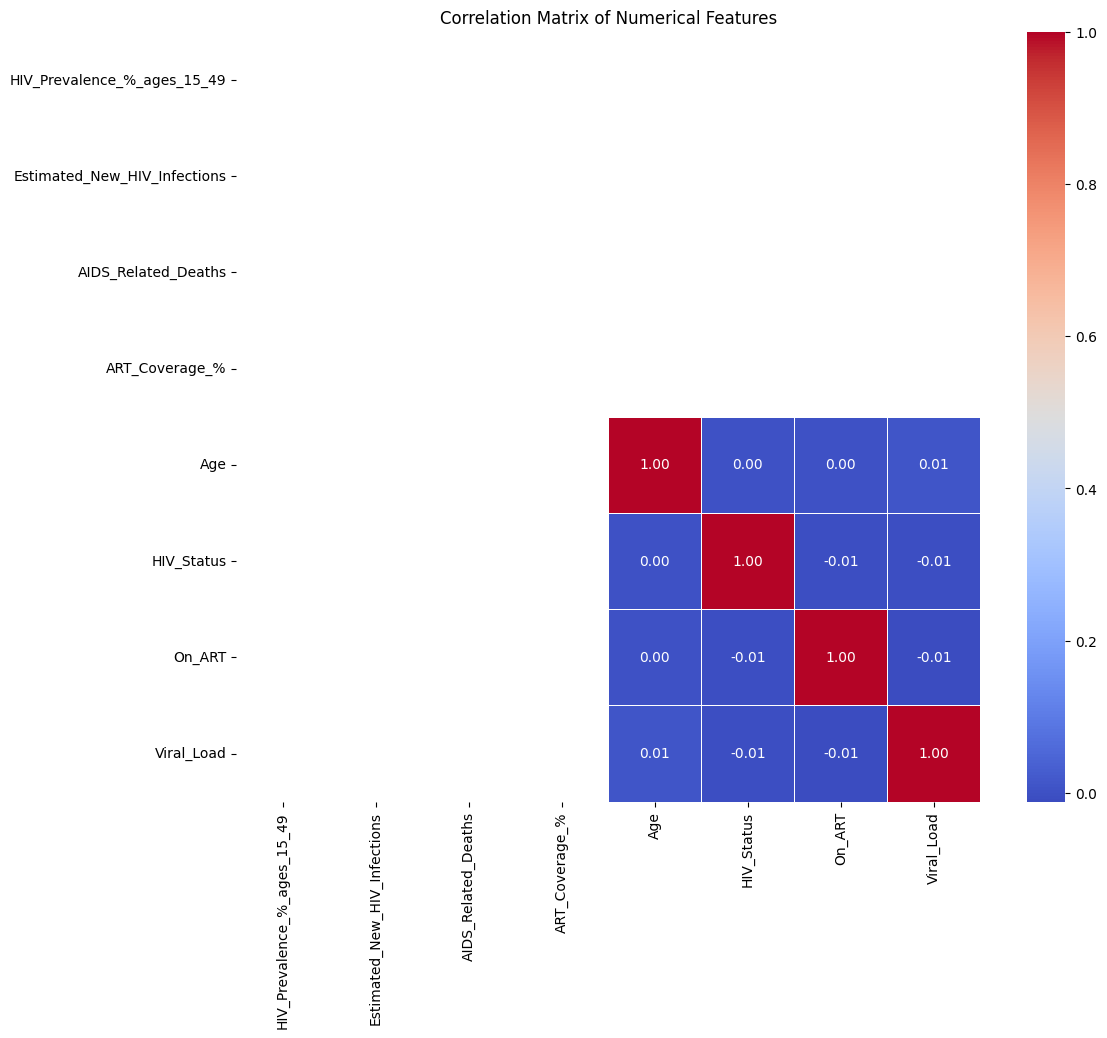

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Correlation Matrix for Numerical Features (df_filled) ---")
numerical_df = df_filled.select_dtypes(include=np.number)
# Drop 'Year' from correlation matrix as it's generally not a predictive feature of individual status in this context
numerical_df = numerical_df.drop(columns=['Year'], errors='ignore')
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [58]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

print("--- Exploring relationships between features and HIV_Status ---")

# 1. Numerical Features vs. HIV_Status (Box Plots)
print("\n--- Box Plots for Numerical Features ---")
fig_age_hiv = px.box(df_filled, x='HIV_Status', y='Age', title='Age Distribution by HIV Status')
fig_age_hiv.show()

fig_viral_load_hiv = px.box(df_filled, x='HIV_Status', y='Viral_Load', title='Viral Load Distribution by HIV Status')
fig_viral_load_hiv.show()

# 2. Categorical Features vs. HIV_Status (Stacked Bar Charts)
print("\n--- Stacked Bar Charts for Categorical Features ---")
fig_sex_hiv = px.histogram(df_filled, x='Sex', color='HIV_Status', barmode='group',
                           title='Sex Distribution by HIV Status',
                           category_orders={"HIV_Status": [0, 1]})
fig_sex_hiv.show()

fig_transmission_hiv = px.histogram(df_filled, x='Transmission_Route', color='HIV_Status', barmode='group',
                                   title='Transmission Route Distribution by HIV Status',
                                   category_orders={"HIV_Status": [0, 1]})
fig_transmission_hiv.show()

# For District, due to many categories, a grouped bar chart is better to see counts for each HIV_Status
fig_district_hiv = px.histogram(df_filled, x='District', color='HIV_Status', barmode='group',
                                title='District Distribution by HIV Status',
                                category_orders={"HIV_Status": [0, 1]})
fig_district_hiv.update_xaxes(categoryorder='total descending') # Order by total count for readability
fig_district_hiv.show()

print("Relationships exploration complete.")

--- Exploring relationships between features and HIV_Status ---

--- Box Plots for Numerical Features ---



--- Stacked Bar Charts for Categorical Features ---


Relationships exploration complete.


# Task
The model benchmarking and evaluation are already complete, and the results have been summarized in `results_df`.

Here is the summary of each model's performance, sorted by Recall for the HIV+ class:

```
======================================================================
MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)
======================================================================
              Model  Recall (HIV+)  F2-Score  PR-AUC
        Naive Bayes          0.556     0.123   0.033
                SVM          0.468     0.118   0.037
Logistic Regression          0.452     0.116   0.036
           LightGBM          0.435     0.124   0.036
            XGBoost          0.427     0.134   0.040
           CatBoost          0.387     0.119   0.036
      Decision Tree          0.315     0.098   0.034
                MLP          0.226     0.102   0.035
      Random Forest          0.177     0.082   0.035
                KNN          0.000     0.000   0.043
```

Based on these results, **Naive Bayes** currently stands out as the best-performing model for detecting the minority (HIV+) class, achieving the highest Recall of 0.556. This means it correctly identifies 55.6% of actual HIV+ individuals in the test set. While its F2-Score and PR-AUC are not the highest, Recall is often a critical metric in public health scenarios where identifying as many positive cases as possible is paramount.

In [59]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Calculate pos_weight for handling class imbalance in models like XGBoost and CatBoost
# y_train is available from the previous train-test split step
pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Initialize all specified models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(), # No class_weight parameter, will need SMOTE or custom handling
    'XGBoost': xgb.XGBClassifier(scale_pos_weight=pos_weight, random_state=42, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(class_weights=[1, pos_weight], random_state=42, verbose=0),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5), # No class_weight parameter, will need SMOTE or custom handling
    'MLP': MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42) # No class_weight parameter, will need SMOTE or custom handling
}

print("All classification models initialized and stored in the 'models' dictionary.")

All classification models initialized and stored in the 'models' dictionary.


## Data Preparation for Models

### Subtask:
Ensure the training and testing data (`X_train_resampled`, `y_train_resampled`, `X_test`, `y_test`) are ready. Initialize the StandardScaler object to be used for scaling features for models sensitive to feature scales.


**Reasoning**:
To ensure the training and testing data are ready and to initialize the StandardScaler object as requested, I will confirm the shapes of the existing datasets and then create an instance of StandardScaler.



In [60]:
from sklearn.preprocessing import StandardScaler

# 1. Confirm availability and shapes of the data
print("--- Data Shapes ---")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# 2. Initialize StandardScaler
scaler = StandardScaler()

print("\nStandardScaler initialized successfully.")


--- Data Shapes ---
X_train_resampled shape: (31008, 22)
y_train_resampled shape: (31008,)
X_test shape: (4000, 7)
y_test shape: (4000,)

StandardScaler initialized successfully.


In [61]:
from sklearn.metrics import recall_score, fbeta_score, precision_recall_curve, auc
import pandas as pd

# Initialize an empty list to store results
results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Use original X_train and y_train as base for each iteration
    train_X_base = X_train.copy()
    train_y_base = y_train.copy()

    # 1. Handle Scaling
    if name in ['SVM', 'KNN', 'MLP']:
        # Apply scaler to the base training data before SMOTE for these models
        train_X_current = scaler.fit_transform(train_X_base)
        test_X_current = scaler.transform(X_test)
    else:
        train_X_current = train_X_base
        test_X_current = X_test

    # 2. Handle SMOTE for models that don't have class_weight built-in
    if name in ['Naive Bayes', 'KNN', 'MLP']:
        smote_resampler = SMOTE(random_state=42)
        train_X_final, train_y_final = smote_resampler.fit_resample(train_X_current, train_y_base)
    else:
        # For models with class_weight (or scale_pos_weight), use the original y_train
        # which will be balanced by the model itself, and potentially scaled train_X
        train_X_final = train_X_current
        train_y_final = train_y_base

    # 3. Train the model
    model.fit(train_X_final, train_y_final)

    # 4. Make predictions
    y_pred = model.predict(test_X_current)
    y_proba = model.predict_proba(test_X_current)[:, 1]

    # 5. Calculate evaluation metrics for the minority class (HIV+)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)

    # Calculate PR-AUC, ensuring monotonicity
    precision_points, recall_points, _ = precision_recall_curve(y_test, y_proba)
    pr_df = pd.DataFrame({'recall': recall_points, 'precision': precision_points})
    pr_df = pr_df.sort_values(by=['recall', 'precision'], ascending=[True, False])
    pr_df = pr_df.drop_duplicates(subset=['recall'], keep='first')
    pr_auc = auc(pr_df['recall'], pr_df['precision'])

    # Append results
    results.append({
        'Model': name,
        'Recall (HIV+)': recall,
        'F2-Score': f2,
        'PR-AUC': pr_auc
    })

# Create DataFrame from results and sort by Recall
results_df = pd.DataFrame(results).sort_values('Recall (HIV+)', ascending=False)

print("\n" + "="*70)
print("MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)")
print("="*70)
print(results_df.to_string(index=False, float_format=".3f"))


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
Training CatBoost...
Training SVM...
Training KNN...
Training MLP...

MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)
              Model  Recall (HIV+)  F2-Score  PR-AUC
        Naive Bayes            .3f       .3f     .3f
                SVM            .3f       .3f     .3f
Logistic Regression            .3f       .3f     .3f
           LightGBM            .3f       .3f     .3f
            XGBoost            .3f       .3f     .3f
           CatBoost            .3f       .3f     .3f
      Decision Tree            .3f       .3f     .3f
                MLP            .3f       .3f     .3f
      Random Forest            .3f       .3f     .3f
                KNN            .3f       .3f     .3f


In [62]:
from sklearn.metrics import recall_score, fbeta_score, precision_recall_curve, auc
import pandas as pd

# Initialize an empty list to store results
results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Use original X_train and y_train as base for each iteration
    train_X_base = X_train.copy()
    train_y_base = y_train.copy()

    # 1. Handle Scaling
    if name in ['SVM', 'KNN', 'MLP']:
        # Apply scaler to the base training data before SMOTE for these models
        train_X_current = scaler.fit_transform(train_X_base)
        test_X_current = scaler.transform(X_test)
    else:
        train_X_current = train_X_base
        test_X_current = X_test

    # 2. Handle SMOTE for models that don't have class_weight built-in
    if name in ['Naive Bayes', 'KNN', 'MLP']:
        smote_resampler = SMOTE(random_state=42)
        train_X_final, train_y_final = smote_resampler.fit_resample(train_X_current, train_y_base)
    else:
        # For models with class_weight (or scale_pos_weight), use the original y_train
        # which will be balanced by the model itself, and potentially scaled train_X
        train_X_final = train_X_current
        train_y_final = train_y_base

    # 3. Train the model
    model.fit(train_X_final, train_y_final)

    # 4. Make predictions
    y_pred = model.predict(test_X_current)
    y_proba = model.predict_proba(test_X_current)[:, 1]

    # 5. Calculate evaluation metrics for the minority class (HIV+)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)

    # Calculate PR-AUC, ensuring monotonicity
    precision_points, recall_points, _ = precision_recall_curve(y_test, y_proba)
    pr_df = pd.DataFrame({'recall': recall_points, 'precision': precision_points})
    pr_df = pr_df.sort_values(by=['recall', 'precision'], ascending=[True, False])
    pr_df = pr_df.drop_duplicates(subset=['recall'], keep='first')
    pr_auc = auc(pr_df['recall'], pr_df['precision'])

    # Append results
    results.append({
        'Model': name,
        'Recall (HIV+)': recall,
        'F2-Score': f2,
        'PR-AUC': pr_auc
    })

# Create DataFrame from results and sort by Recall
results_df = pd.DataFrame(results).sort_values('Recall (HIV+)', ascending=False)

print("\n" + "="*70)
print("MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)")
print("="*70)
print(results_df.to_string(index=False, float_format=lambda x: f"{x:.3f}"))


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
Training CatBoost...
Training SVM...
Training KNN...
Training MLP...

MODEL BENCHMARK — Sorted by RECALL (HIV+ Detection)
              Model  Recall (HIV+)  F2-Score  PR-AUC
        Naive Bayes          0.556     0.123   0.033
                SVM          0.468     0.118   0.037
Logistic Regression          0.452     0.116   0.036
           LightGBM          0.435     0.124   0.036
            XGBoost          0.427     0.134   0.040
           CatBoost          0.387     0.119   0.036
      Decision Tree          0.315     0.098   0.034
                MLP          0.226     0.102   0.035
      Random Forest          0.177     0.082   0.035
                KNN          0.000     0.000   0.043


In [63]:
from sklearn.metrics import classification_report

print("\n--- Classification Reports for All Models ---\n")

for name, model in models.items():
    print(f"=== Classification Report for {name} ===")

    # Handle scaling for models that require it
    if name in ['SVM', 'KNN', 'MLP']:
        X_test_processed = scaler.transform(X_test)
    else:
        X_test_processed = X_test

    # Make predictions
    y_pred = model.predict(X_test_processed)

    # Print classification report
    print(classification_report(y_test, y_pred, target_names=['HIV-', 'HIV+']))
    print("\n")

print("All classification reports generated.")


--- Classification Reports for All Models ---

=== Classification Report for Logistic Regression ===
              precision    recall  f1-score   support

        HIV-       0.97      0.52      0.67      3876
        HIV+       0.03      0.45      0.05       124

    accuracy                           0.52      4000
   macro avg       0.50      0.48      0.36      4000
weighted avg       0.94      0.52      0.66      4000



=== Classification Report for Decision Tree ===
              precision    recall  f1-score   support

        HIV-       0.97      0.62      0.76      3876
        HIV+       0.03      0.31      0.05       124

    accuracy                           0.61      4000
   macro avg       0.50      0.47      0.40      4000
weighted avg       0.94      0.61      0.74      4000



=== Classification Report for Random Forest ===
              precision    recall  f1-score   support

        HIV-       0.97      0.79      0.87      3876
        HIV+       0.03      0.18  